# Crime dataset in Los Angeles 2024 - Machine Learning Model Prediction

## SUPERVISED & UNSUPERVISED LEARNING + DEEP LEARNING

#### **Data:** *01/01/2020 - 08/01/2024*
#### **By** Diego Cabezas, FL
---
## **Dataset:** Crime Data from 2020 to Present
[<button style="background-color: #4CAF50; color: white; padding: 10px 20px; text-align: center; text-decoration: none; display: inline-block; font-size: 16px;">Dataset file</button>](https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD)


# Predicting Crime Type

**Objective:**

Given the crime data, a useful objective for the LAPD could be to predict whether a crime will be violent or non-violent based on various features such as crime type, area of crime, time, and victim characteristics, date and weapon used if any.

**Target Variable:**

violent_crime:

1 for violent crime


0 for non-violent crime


**Features:**

	•	area name: Categorical (encoded as integers)
	•	vict age: Numeric
	•	vict sex: Categorical (encoded as integers)
	•	vict descent: Categorical (encoded as integers)
	•	weapon desc: Categorical (encoded as integers)
	•	year: Numeric
	•	month: Numeric
	•	day: Numeric
	•	hour: Numeric

#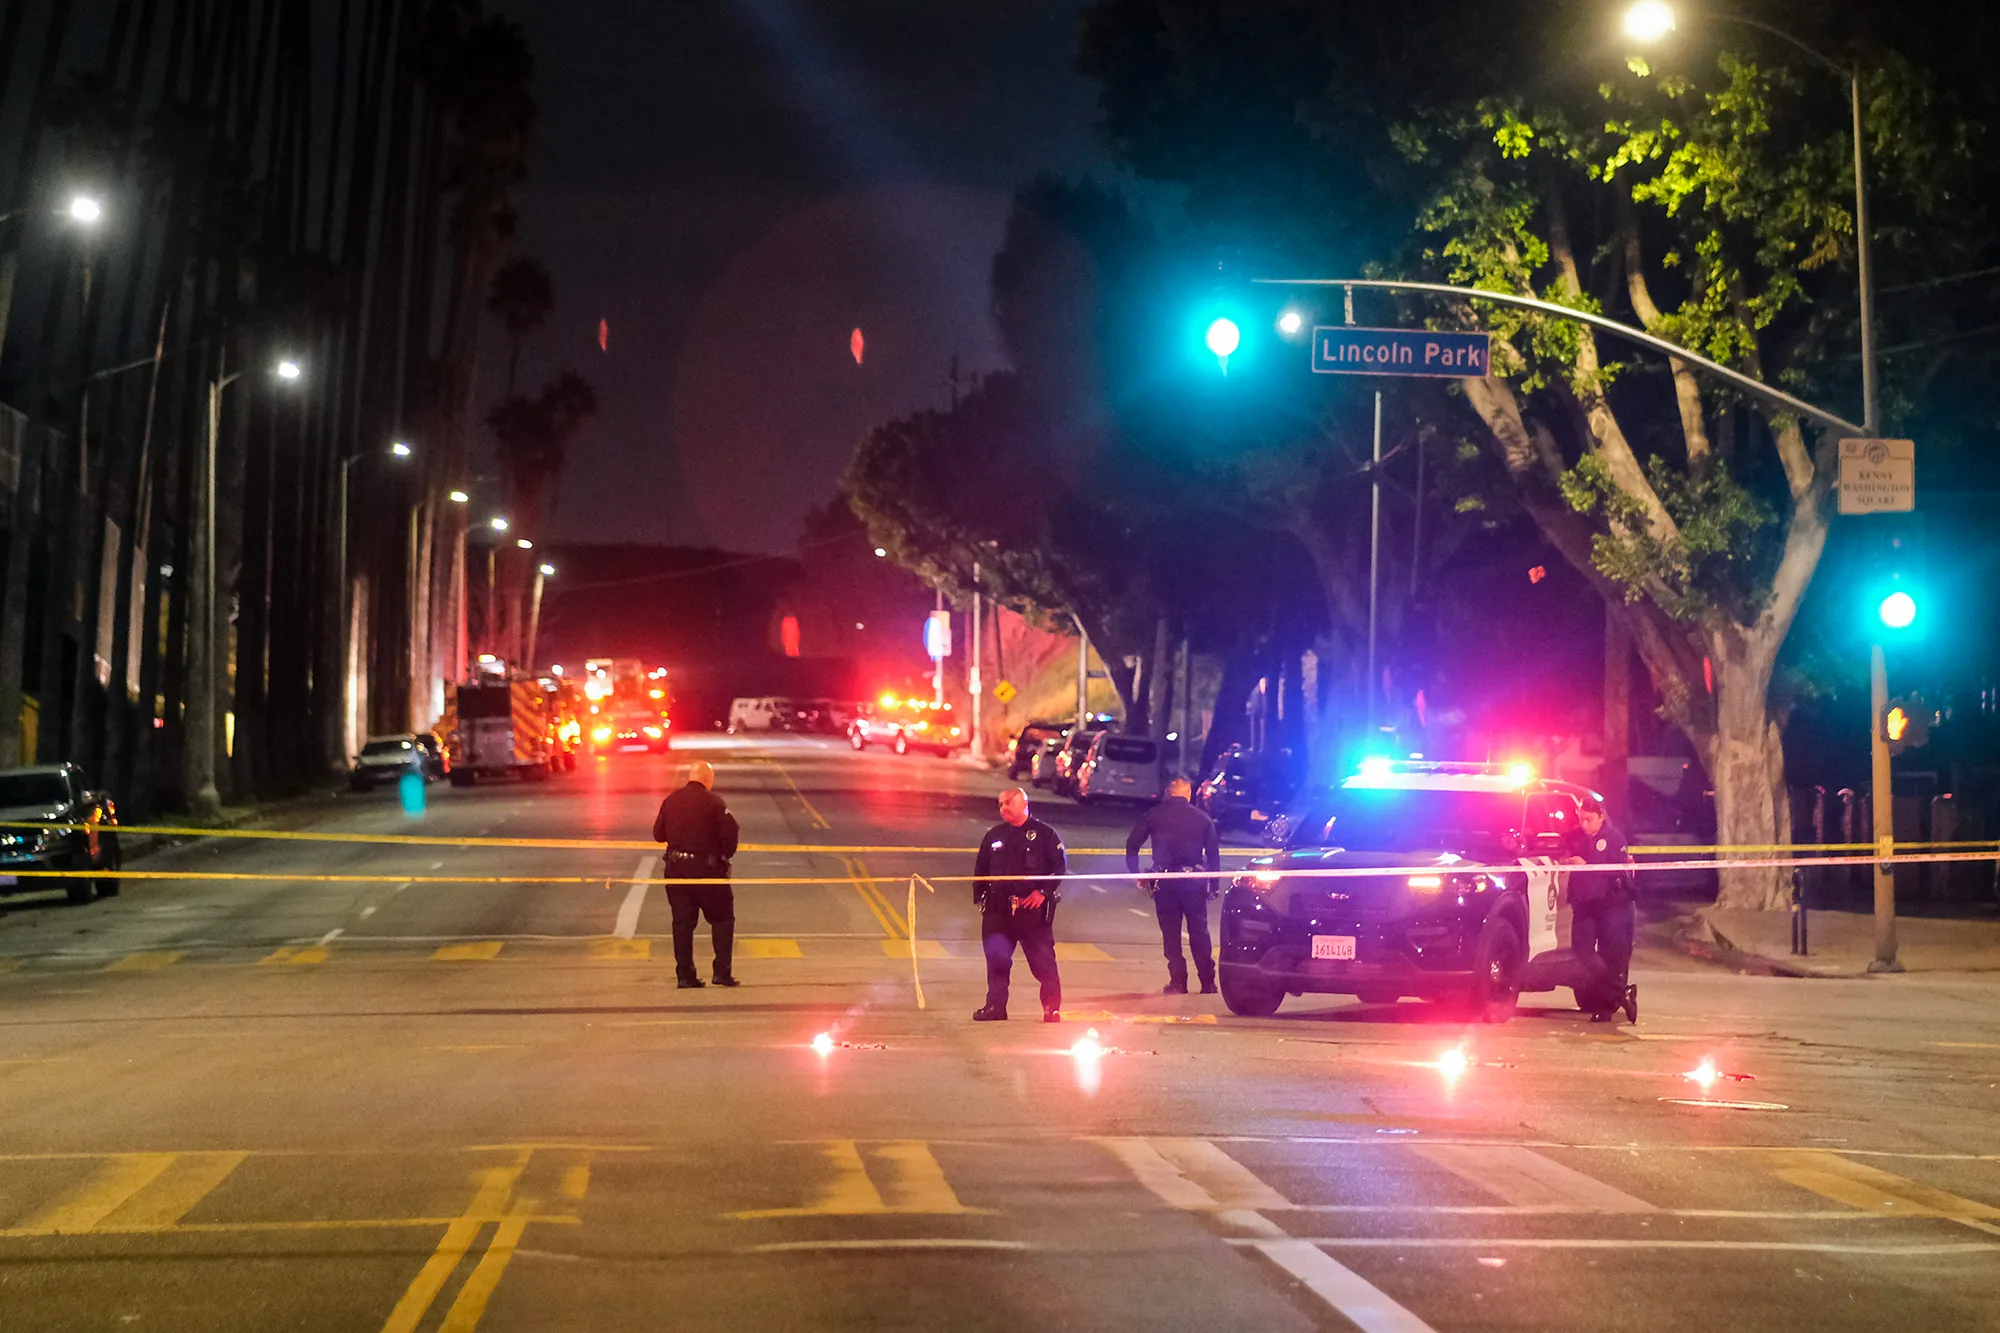



#Reseach Proposal

##Crime Prediction and Resource Allocation Using LAPD Data

**Problem Statement**
The Los Angeles Police Department (LAPD) faces the ongoing challenge of efficiently allocating resources to manage and prevent crime. With nearly 1 million records daily inputted into their database, the sheer volume of data presents an opportunity to enhance decision-making processes. The problem is how to utilize this data to predict crime hotspots and optimize resource allocation, thereby improving public safety and operational efficiency.

**Value Proposition**
The proposed solution aims to develop a predictive model that forecasts crime occurrences and identifies patterns in the data. By providing actionable insights, this model will assist the LAPD in strategically deploying personnel and resources to areas with a high likelihood of criminal activity. This will not only enhance public safety but also optimize the use of limited resources, potentially reducing crime rates and increasing the effectiveness of police operations.

**Data Source and Access**
The primary data source will be the publicly available LAPD crime dataset from 2020, which will be continuously updated through an API. The dataset includes detailed records of incidents, such as location, time, and type of crime. Access to this data will be ensured by setting up an automated pipeline to ingest daily updates, maintaining a current and comprehensive dataset for analysis.

**Techniques and Specialization Topics**
1. Supervised Learning: I will use techniques such as classification to predict future crime occurrences based on historical data.
2. Unsupervised Learning: Clustering algorithms will be applied to identify patterns and groupings within the data, such as crime hotspots and types of crimes.
3. Data Preprocessing: Cleaning and transforming the data to ensure accuracy and relevancy, including handling missing values and normalizing data.
4. Feature Engineering: Extracting relevant features such as time of day, location coordinates, and crime type to enhance model performance.

**Biggest Challenges**
The most significant challenges anticipated include handling the large volume of data and ensuring data quality. Integrating daily updates without interruptions and managing the computational resources required for real-time predictions are potential hurdles. Additionally, there may be challenges related to the interpretability of complex models and ensuring the predictions' accuracy and reliability.

**Product Vision and User Impact**
The end product will be a predictive analytics model that can be accessed through a Jupyter Notebook. It will offer a user-friendly interface for law enforcement agencies to visualize crime trends, make predictions and receive actionable insights. The product's utility will extend beyond the LAPD, offering a framework for other law enforcement agencies to adopt similar predictive analytics solutions.

**Project Goals**
The primary goal is to create a robust, accurate, and interpretable model that provides valuable predictions and insights into crime trends. The project will demonstrate practical applications of data science techniques learned throughout the program, emphasizing the model's utility in real-world scenarios. The success of the project will be measured by the model's accuracy, the clarity of insights provided, and the potential impact on resource allocation strategies.

**Conclusion**
This project offers a practical solution to a real-world problem, leveraging advanced data science techniques to improve public safety and resource management. By focusing on the LAPD's needs and providing a scalable model, the project aims to deliver a valuable tool that can be extended to other jurisdictions, potentially evolving into a marketable product.


#Data input

The data comes from [Data.gov](https://catalog.data.gov/dataset/crime-data-from-2020-to-present) and contains almost 1 million observations and 28 variables.

(*Data gets updated DAILY, when this notebook run it uploads the data up until that day*)

**Columns details**

https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8/about_data

Imports

In [ ]:
import time
import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
import requests

import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Define the URL of the dataset
url = 'https://data.lacity.org/api/views/2nrs-mtv8/rows.csv?accessType=DOWNLOAD'

# Send a GET request to the URL and save the content to a local file
response = requests.get(url)
with open('Crime_Data_since_2020.csv', 'wb') as file:
    file.write(response.content)

# Load the data into a DataFrame
crime_la = pd.read_csv('Crime_Data_since_2020.csv')
print(f"Total rows fetched: {len(crime_la)}")

Total rows fetched: 963006


In [ ]:
crime_la

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,242106032,02/20/2024 12:00:00 AM,02/17/2024 12:00:00 AM,2330,21,Topanga,2103,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,22700 NAPA ST,NaN,34.2260,-118.6214
963002,242004546,01/16/2024 12:00:00 AM,01/16/2024 12:00:00 AM,1510,20,Olympic,2013,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
963003,240104953,01/15/2024 12:00:00 AM,01/15/2024 12:00:00 AM,100,1,Central,101,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460
963004,241711348,07/19/2024 12:00:00 AM,07/19/2024 12:00:00 AM,757,17,Devonshire,1751,2,888,TRESPASSING,...,IC,Invest Cont,888.0,NaN,NaN,NaN,10000 OLD DEPOT PLAZA RD,NaN,34.2500,-118.5990


**DATA CAN BE ALSO PULLED ONLY FOR 2024**

```python
# Convert column headers to lower case for ease of coding
crime_la.columns = crime_la.columns.str.lower()

# Convert the 'date rptd' to datetime format
crime_la['date rptd'] = pd.to_datetime(crime_la['date rptd'])

crime_la = crime_la[crime_la['date rptd'].dt.year == 2024]

# Save the filtered data to a new CSV file
crime_la.to_csv("/content/Crime_Data_2024.csv", index=False)

print(f"Total rows from 2024: {len(crime_la_2024)}")

crime_la = pd.read_csv("/content/Crime_Data_2024.csv")


**DATA CAN ALSO BE PULLED USING API** / data pull batches of 1000 max

```python
## Define the API endpoint
url = 'https://data.lacity.org/resource/2nrs-mtv8.json'

## Initialize an empty list to store the data
all_data = []

## Define the limit and initial offset
limit = 1000
offset = 0

## Loop until no more data is returned
while True:
    # Fetch the data from the API with the specified limit and offset
    response = requests.get(url, params={'$limit': limit, '$offset': offset})

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON data
        data = response.json()

        # If no more data is returned, break the loop
        if not data:
            break

        # Append the data to the list
        all_data.extend(data)

        # Increment the offset
        offset += limit
    else:
        print(f"Failed to fetch data. Status code: {response.status_code}")
        break

## Load the data into a DataFrame
crime_la = pd.DataFrame(all_data)

print(f"Total rows fetched: {len(crime_la)}")


In [ ]:
# crime_la = pd.read_csv("/content/Crime_Data_2024.csv")

# Data Cleaning (EDA)

## Variable types

IF API IS USED THEN

```python
# Rename columns by replacing underscores with spaces, except for 'dr_no' and 'part_1_2'
crime_la.columns = [col if col in ['dr_no', 'part_1_2'] else col.replace('_', ' ') for col in crime_la.columns]

# Manually rename 'part_1_2' to 'part 1-2'
crime_la.rename(columns={'part_1_2': 'part 1-2'}, inplace=True)


In [ ]:
# Convert column headers to lower case for ease of coding
crime_la.columns = crime_la.columns.str.lower()
print(crime_la.shape)


crime_la.info()

(963006, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   dr_no           963006 non-null  int64  
 1   date rptd       963006 non-null  object 
 2   date occ        963006 non-null  object 
 3   time occ        963006 non-null  int64  
 4   area            963006 non-null  int64  
 5   area name       963006 non-null  object 
 6   rpt dist no     963006 non-null  int64  
 7   part 1-2        963006 non-null  int64  
 8   crm cd          963006 non-null  int64  
 9   crm cd desc     963006 non-null  object 
 10  mocodes         823889 non-null  object 
 11  vict age        963006 non-null  int64  
 12  vict sex        830505 non-null  object 
 13  vict descent    830495 non-null  object 
 14  premis cd       962992 non-null  float64
 15  premis desc     962431 non-null  object 
 16  weapon used cd  325345 non-null  float64
 1

In [ ]:
crime_la.head()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,...,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


Are all the types visually the same compared to .head()?

**Target Variable= 'crm cd desc'** is Continuous or Categorical?

In [ ]:
# UNIQUE VALUES
crime_la.nunique()

,0
dr_no,963006
date rptd,1665
date occ,1665
time occ,1439
area,21
area name,21
rpt dist no,1209
part 1-2,2
crm cd,139
crm cd desc,139


In [ ]:
# Display unique values and their counts in the 'crm_cd_desc' column
crime_type_counts = crime_la['crm cd desc'].value_counts()
print("Unique Crime Types and their Counts:")
print(crime_type_counts)

Unique Crime Types and their Counts:
crm cd desc
VEHICLE - STOLEN                                           106420
BATTERY - SIMPLE ASSAULT                                    74614
BURGLARY FROM VEHICLE                                       59808
THEFT OF IDENTITY                                           59548
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)     58437
                                                            ...  
BLOCKING DOOR INDUCTION CENTER                                  6
FIREARMS EMERGENCY PROTECTIVE ORDER (FIREARMS EPO)              5
DISHONEST EMPLOYEE ATTEMPTED THEFT                              4
FIREARMS RESTRAINING ORDER (FIREARMS RO)                        4
TRAIN WRECKING                                                  1
Name: count, Length: 139, dtype: int64


**Conclusion:**

Categorical variable


--Classification problem--

In [ ]:
# Display unique values and their counts
sex_counts = crime_la['vict sex'].value_counts()
print("Unique Victim Sex and their Counts:")
print(sex_counts)


Unique Victim Sex and their Counts:
vict sex
M    391192
F    348487
X     90716
H       109
-         1
Name: count, dtype: int64


## Missing values

In [ ]:
# Detect missing values

# This function returns True if an element has no value; otherwise,
# it returns None or False for each element in a DataFrame.
crime_la.isnull()

,dr_no,date rptd,date occ,time occ,area,area name,rpt dist no,part 1-2,crm cd,crm cd desc,...,status,status desc,crm cd 1,crm cd 2,crm cd 3,crm cd 4,location,cross street,lat,lon
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
963002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,False,False,False
963003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False
963004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,True,True,False,True,False,False


In [ ]:
# List unique values in each column with 10 or fewer unique values
for column_name in crime_la.columns:
    if crime_la[column_name].nunique() <= 10:
        print(f"Unique values in column {column_name} are: {crime_la[column_name].unique()}")

Unique values in column part 1-2 are: [1 2]
Unique values in column vict sex are: ['M' 'X' 'F' nan 'H' '-']
Unique values in column status are: ['AA' 'IC' 'JA' 'AO' 'JO' 'CC' nan]
Unique values in column status desc are: ['Adult Arrest' 'Invest Cont' 'Juv Arrest' 'Adult Other' 'Juv Other' 'UNK']
Unique values in column crm cd 4 are: [ nan 998. 930. 821. 910. 999. 946.]


In [ ]:
# Check for missing values
missing_values = crime_la.isnull().sum()
print(missing_values)

dr_no                  0
date rptd              0
date occ               0
time occ               0
area                   0
area name              0
rpt dist no            0
part 1-2               0
crm cd                 0
crm cd desc            0
mocodes           139117
vict age               0
vict sex          132501
vict descent      132511
premis cd             14
premis desc          575
weapon used cd    637661
weapon desc       637661
status                 1
status desc            0
crm cd 1              11
crm cd 2          894402
crm cd 3          960705
crm cd 4          962942
location               0
cross street      813230
lat                    0
lon                    0
dtype: int64


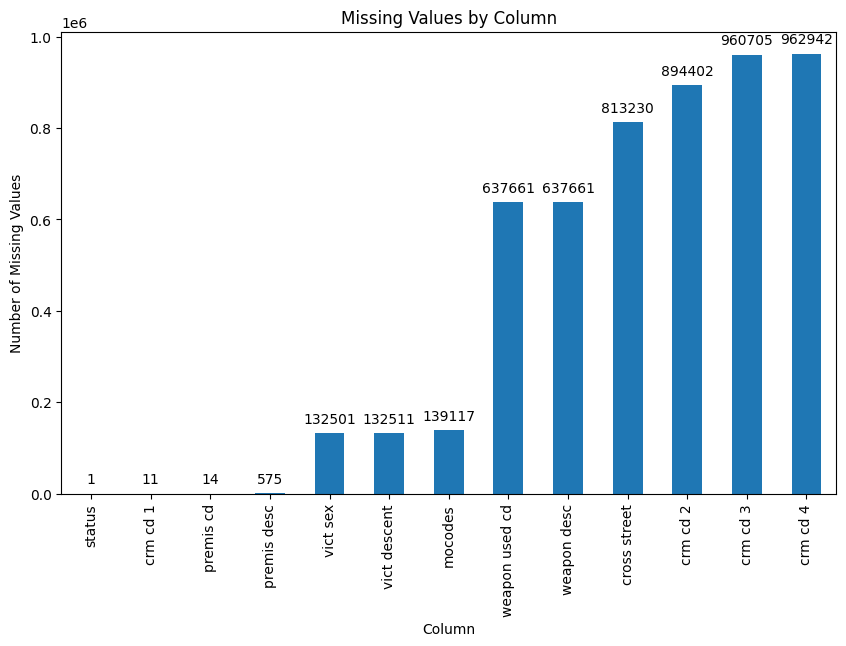

In [ ]:
# Filter to include only columns with more than 0 missing values
more_than_0_missing_values = missing_values[missing_values > 0]

# Sort the missing values in ascending order
more_than_0_missing_values = more_than_0_missing_values.sort_values()

# Plot the missing values
plt.figure(figsize=(10, 6))
ax = more_than_0_missing_values.plot(kind='bar')
plt.title('Missing Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Missing Values')

# Add Labels on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
# % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
dr_no,0.000000
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000


### Check for Empty string counts on categorical variables

What if yes?


' Replace empty with NaN

youtube_df.Grade = youtube_df.Grade.apply(str.strip).replace("", np.nan)

youtube_df.Grade.unique()'

In [ ]:
# Check for duplicate rows
duplicates = crime_la[crime_la.duplicated(keep=False)]

# Display the appropriate message
if duplicates.empty:
    print("NO DUPLICATES FOUND")
else:
    print("Here are the duplicates:")
    print(duplicates)


NO DUPLICATES FOUND


In [ ]:
# Initialize a flag to check if any columns with empty or trailing spaces are found
found = False

# Loop through each column in the DataFrame
for column in crime_la.columns:
    if crime_la[column].dtype == 'object':  # Check if the column is of type 'object'
        value_counts = crime_la[column].value_counts()  # Calculate value counts
        # Check for empty strings or strings that might contain only spaces
        if '' in value_counts.index or ' ' in value_counts.index:
            print(f"Value counts for column {column} (including empty/trailing spaces):\n{value_counts}\n")
            found = True  # Set the flag to True if such a column is found

# If no columns with empty or trailing spaces were found, print message
if not found:
    print("No variables found with empty strings or strings that contain only spaces.")


No variables found with empty strings or strings that contain only spaces.


### Handling missing values


*   Disregarding the rows with missing values?
*   Filling the missing values with some unharmful values?

Given the missing value percentages, a combination of both approaches might be the most effective:

1. Remove Columns with Excessive Missing Data:

**crm cd 2, crm cd 3, crm cd 4** (crime codes): These columns have over 90% missing data. It's unlikely they'll contribute meaningful information to your model, so removing them is a safe bet.
2. Impute Missing Values in Other Columns:

**mocodes, vict sex, vict descent**: These columns have a moderate amount of missing data (around 13-14%). Imputation methods like k-Nearest Neighbors (KNN) or Multiple Imputation by Chained Equations (MICE) could be suitable choices.


**weapon used cd, weapon desc**: These columns have a high percentage of missing values (65%). However, given the context of crime prediction, information about the weapon used could be crucial. Considering using a category like "Unknown" to replace missing values.


**premis desc, cross street**: These columns describe the location of the crime, which could be valuable for prediction. Imputation methods like KNN or using the most frequent category could be helpful.


**premis cd:** This column has a very low percentage of missing values (0.1%). Simple imputation methods like using the most frequent category should suffice.

**Remove Columns with Excessive Missing Data:
crm cd 2, crm cd 3, crm cd 4**

In [ ]:
# Drop the 'crm cd 2', 'crm cd 3', 'crm cd 4' columns from the DataFrame
columns_to_drop = ['crm cd 2', 'crm cd 3', 'crm cd 4']
crime_la.drop(columns_to_drop, axis=1, inplace=True)

**Column 'mocodes' eliminated it wont be used the study:**
Modus Operandi: Activities associated with the suspect in commission of the crime. e.g: 2047 0400 0429 0444 1202 1822

In [ ]:
# Drop the 'dr_no' column from the DataFrame
crime_la.drop('mocodes', axis=1, inplace=True)

**Column 'dr_no' eliminated it wont be used the study:**
Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits

In [ ]:
# Drop the 'dr_no' column from the DataFrame
crime_la.drop('dr_no', axis=1, inplace=True)

### Filling in the missing values

In [ ]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'vict sex':**
F - Female M - Male X - Unknown

In [ ]:
# Display unique values in the 'vict_sex' column
unique_vict_sex = crime_la['vict sex'].unique()
print(unique_vict_sex)

['M' 'X' 'F' nan 'H' '-']


In [ ]:
# Print 'vict_sex' and 'vict_age' columns together
print(crime_la[['crm cd desc', 'vict age', 'vict sex']])


                                            crm cd desc  vict age vict sex
0                                      VEHICLE - STOLEN         0        M
1                                 BURGLARY FROM VEHICLE        47        M
2                                         BIKE - STOLEN        19        X
3              SHOPLIFTING-GRAND THEFT ($950.01 & OVER)        19        M
4                                     THEFT OF IDENTITY        28        M
...                                                 ...       ...      ...
963001  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)        44        F
963002                         BATTERY - SIMPLE ASSAULT        80        F
963003         VANDALISM - MISDEAMEANOR ($399 OR UNDER)         0        X
963004                                      TRESPASSING         0        X
963005   ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT        70        F

[963006 rows x 3 columns]


In [ ]:
# Condition to filter rows where 'vict_sex' is NaN, 'H', or '-'
conditions = crime_la['vict sex'].isin(['H', '-']) | crime_la['vict sex'].isnull()

# Filter the DataFrame based on the condition and select specific columns
filtered_data = crime_la[conditions][['crm cd desc', 'vict age', 'vict sex']]

# Print the filtered DataFrame
print(filtered_data)


                                            crm cd desc  vict age vict sex
13                                     VEHICLE - STOLEN         0      NaN
24                                     VEHICLE - STOLEN         0      NaN
27           EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)         0      NaN
33      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN
34      THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN
...                                                 ...       ...      ...
962986                                 VEHICLE - STOLEN         0      NaN
962987                                 VEHICLE - STOLEN         0      NaN
962988                                 VEHICLE - STOLEN         0      NaN
962989  THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)         0      NaN
962992                                 VEHICLE - STOLEN         0      NaN

[132611 rows x 3 columns]


In [ ]:
# Further filter the data to include only rows where 'vict age' is 0
filtered_data = filtered_data[filtered_data['vict age'] == 0]

# Count occurrences per crime type
crime_counts = filtered_data['crm cd desc'].value_counts()

# Print the results
print(crime_counts)

crm cd desc
VEHICLE - STOLEN                                            105848
THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)              21839
EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)                    2121
VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)      1623
THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD       562
BOAT - STOLEN                                                  140
BURGLARY                                                        65
BURGLARY FROM VEHICLE                                           32
THEFT PLAIN - PETTY ($950 & UNDER)                              31
ROBBERY                                                         25
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)         24
TRESPASSING                                                     23
THEFT OF IDENTITY                                               17
SHOPLIFTING - PETTY THEFT ($950 & UNDER)                        14
DOCUMENT FORGERY / STOLEN FELONY                  

Many rows in the crime dataset have missing values for both 'vict age' and 'vict sex', likely due to privacy concerns, data collection challenges, reporting errors, the nature of certain crimes like vehicle theft where such details are less critical, or database management practices that may not enforce strict data completeness.


Columns that are not the features that will be used for the specific objective will be dropped.

In [ ]:
# Replace 'NaN', 'H', '-' in 'vict sex' with 'X'
crime_la['vict sex'] = crime_la['vict sex'].replace(['H', '-'], 'X')
crime_la['vict sex'].fillna('X', inplace=True)

# Verify the changes by viewing the unique values in the 'vict_sex' column
print(crime_la['vict sex'].unique())

['M' 'X' 'F']


In [ ]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'vict descent'**

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [ ]:
# 'vict descent'
# Display unique values
unique_vict_descent = crime_la['vict descent'].unique()
print(unique_vict_descent)

['O' 'X' 'H' 'B' 'W' nan 'A' 'K' 'C' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U'
 'D' 'L' '-']


In [ ]:
# Filter rows where 'vict_descent' is either 'nan' (NaN) or '-'
filtered_data = crime_la[(crime_la['vict descent'] == '-') | (crime_la['vict descent'].isna())]

# Select only the desired columns
filtered_data = filtered_data[['vict descent', 'vict sex', 'vict age', 'crm cd desc']]

In [ ]:
filtered_data

,vict descent,vict sex,vict age,crm cd desc
13,NaN,X,0,VEHICLE - STOLEN
24,NaN,X,0,VEHICLE - STOLEN
27,NaN,X,0,"EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)"
33,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
34,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
...,...,...,...,...
962986,NaN,X,0,VEHICLE - STOLEN
962987,NaN,X,0,VEHICLE - STOLEN
962988,NaN,X,0,VEHICLE - STOLEN
962989,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)


In [ ]:
# Replace 'nan' and '-' with 'X' for unknown or unrecorded values
crime_la['vict descent'].replace('-', 'X', inplace=True)
crime_la['vict descent'].replace(np.nan, 'X', inplace=True)

# Verify the changes by viewing the unique values in the 'vict_descent' column
print(crime_la['vict descent'].unique())

['O' 'X' 'H' 'B' 'W' 'A' 'K' 'C' 'J' 'F' 'I' 'V' 'S' 'P' 'Z' 'G' 'U' 'D'
 'L']


In [ ]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'premis cd'**

FLOAT


The type of structure, vehicle, or location where the crime took place.

In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       963006 non-null  object 
 1   date occ        963006 non-null  object 
 2   time occ        963006 non-null  int64  
 3   area            963006 non-null  int64  
 4   area name       963006 non-null  object 
 5   rpt dist no     963006 non-null  int64  
 6   part 1-2        963006 non-null  int64  
 7   crm cd          963006 non-null  int64  
 8   crm cd desc     963006 non-null  object 
 9   vict age        963006 non-null  int64  
 10  vict sex        963006 non-null  object 
 11  vict descent    963006 non-null  object 
 12  premis cd       962992 non-null  float64
 13  premis desc     962431 non-null  object 
 14  weapon used cd  325345 non-null  float64
 15  weapon desc     325345 non-null  object 
 16  status          963005 non-null  object 
 17  status des

In [ ]:
print(crime_la['premis cd'].head(5))

0    101.0
1    128.0
2    502.0
3    405.0
4    102.0
Name: premis cd, dtype: float64


In [ ]:
# Display unique values
unique_premis = crime_la['premis cd'].unique()
print(unique_premis)

[101. 128. 502. 405. 102. 501. 248. 750. 751. 203. 108. 504. 605. 404.
 221. 707. 702. 209. 726. 801. 729. 602. 725. 737. 124. 720. 116. 103.
 122. 506. 212. 505. 701. 112. 710. 120. 406. 721. 145. 503. 735. 604.
 109. 712. 717. 708. 104. 152. 607. 238. 222. 119. 507. 514. 125. 220.
 154. 704. 740. 243. 517. 802. 732. 943. 121. 111. 804. 207. 518. 301.
 127. 403. 210. 733. 510. 603. 208. 123. 135. 410. 247. 217. 719. 412.
 834. 401. 402. 727. 155. 724. 906. 231. 235. 242. 146. 903. 232. 253.
 949. 706. 868. 252. 118. 254. 218. 156. 202. 511. 409. 142. 913. 945.
 214. 736. 713. 213. 753. 249. 921. 251. 138. 835. 508. 114. 418. 302.
 158. 904. 415. 516. 722. 755. 229. 241. 106. 408. 117. 946. 256. 417.
 709. 201. 515. 730. 966. 411. 718. 211. 728. 703. 407. 219. 741. 935.
 752. 738. 413. 744. 416. 206. 244. 900. 255. 519. 754. 916. 509. 901.
 237. 885. 942. 922. 151. 971. 239. 140. 912. 606. 150. 144. 110. 723.
 230. 902. 705. 716. 157. 141. 948. 115. 113. 303. 908. 905. 895. 107.
 745. 

In [ ]:
# Filter rows where 'premis_cd' is NaN
filtered_data = crime_la[crime_la['premis cd'].isna()]

# Select only the desired columns
filtered_data = filtered_data[['premis cd', 'vict sex', 'vict age', 'crm cd desc']]

filtered_data

,premis cd,vict sex,vict age,crm cd desc
30021,NaN,X,0,VEHICLE - STOLEN
73641,NaN,X,0,VEHICLE - STOLEN
341923,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
380764,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
386915,NaN,X,0,OTHER MISCELLANEOUS CRIME
503006,NaN,X,0,VEHICLE - ATTEMPT STOLEN
508250,NaN,X,0,VEHICLE - ATTEMPT STOLEN
540545,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
646596,NaN,X,0,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)
708354,NaN,F,57,INTIMATE PARTNER - SIMPLE ASSAULT


In [ ]:
# code for UNKNOWN = 10 to keep the float type instead of 'X'
# Replace NaN values in 'premis cd' with 10
crime_la['premis cd'].fillna(10, inplace=True)

# Verify the changes
print(crime_la['premis cd'].unique())

[101. 128. 502. 405. 102. 501. 248. 750. 751. 203. 108. 504. 605. 404.
 221. 707. 702. 209. 726. 801. 729. 602. 725. 737. 124. 720. 116. 103.
 122. 506. 212. 505. 701. 112. 710. 120. 406. 721. 145. 503. 735. 604.
 109. 712. 717. 708. 104. 152. 607. 238. 222. 119. 507. 514. 125. 220.
 154. 704. 740. 243. 517. 802. 732. 943. 121. 111. 804. 207. 518. 301.
 127. 403. 210. 733. 510. 603. 208. 123. 135. 410. 247. 217. 719. 412.
 834. 401. 402. 727. 155. 724. 906. 231. 235. 242. 146. 903. 232. 253.
 949. 706. 868. 252. 118. 254. 218. 156. 202. 511. 409. 142. 913. 945.
 214. 736. 713. 213. 753. 249. 921. 251. 138. 835. 508. 114. 418. 302.
 158. 904. 415. 516. 722. 755. 229. 241. 106. 408. 117. 946. 256. 417.
 709. 201. 515. 730. 966. 411. 718. 211. 728. 703. 407. 219. 741. 935.
 752. 738. 413. 744. 416. 206. 244. 900. 255. 519. 754. 916. 509. 901.
 237. 885. 942. 922. 151. 971. 239. 140. 912. 606. 150. 144. 110. 723.
 230. 902. 705. 716. 157. 141. 948. 115. 113. 303. 908. 905. 895. 107.
 745. 

In [ ]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'premis desc'**


Defines the Premise Code provided.

In [ ]:
# Display unique values
unique_premis_desc = crime_la['premis desc'].unique()
print(unique_premis_desc)

['STREET' 'BUS STOP/LAYOVER (ALSO QUERY 124)'
 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)' 'CLOTHING STORE'
 'SIDEWALK' 'SINGLE FAMILY DWELLING' 'CELL PHONE STORE' 'CYBERSPACE'
 'WEBSITE' 'OTHER BUSINESS' 'PARKING LOT' 'OTHER RESIDENCE'
 'AUTOMATED TELLER MACHINE (ATM)' 'DEPARTMENT STORE' 'PUBLIC STORAGE'
 'GARAGE/CARPORT' 'OFFICE BUILDING/OFFICE' 'EQUIPMENT RENTAL'
 'POLICE FACILITY' 'MTA BUS' 'SPECIALTY SCHOOL/OTHER' 'BANK'
 'GOVERNMENT FACILITY (FEDERAL,STATE, COUNTY & CITY)' 'SKATING RINK*'
 'BUS STOP' 'JUNIOR HIGH SCHOOL' 'OTHER/OUTSIDE' 'ALLEY'
 'VEHICLE, PASSENGER/TRUCK' 'ABANDONED BUILDING ABANDONED HOUSE'
 'TRANSPORTATION FACILITY (AIRPORT)' 'MOTEL' 'HOSPITAL'
 'BUS, SCHOOL, CHURCH' 'OTHER PREMISE' 'STORAGE SHED' 'OTHER STORE'
 'HIGH SCHOOL' 'MAIL BOX' 'HOTEL' 'NIGHT CLUB (OPEN EVENINGS ONLY)'
 'FINANCE COMPANY' 'PARK/PLAYGROUND' 'COLISEUM' 'HEALTH SPA/GYM'
 'CHURCH/CHAPEL (CHANGED 03-03 FROM CHURCH/TEMPLE)' 'DRIVEWAY'
 'UNDERPASS/BRIDGE*' 'BANKING INSIDE MARKET-STORE *'
 '

In [ ]:
# Replace NaN values in 'premis desc' with 'X'
crime_la['premis desc'].fillna('X', inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'weapon used cd'**
FLOAT

The type of weapon used in the crime

In [ ]:
# Display unique values
unique_weapon_used_cd = crime_la['weapon used cd'].unique()
print(unique_weapon_used_cd)

[ nan 400. 307. 500. 511. 301. 102. 106. 200. 305. 205. 215. 223. 512.
 308. 207. 515. 201. 311. 114. 109. 113. 208. 107. 204. 312. 306. 103.
 218. 506. 101. 212. 216. 206. 303. 304. 302. 309. 513. 213. 210. 219.
 104. 310. 503. 110. 510. 514. 202. 221. 211. 112. 501. 105. 508. 504.
 203. 115. 509. 122. 505. 217. 120. 220. 502. 507. 516. 300. 214. 125.
 108. 116. 121. 209. 123. 111. 118. 119. 117. 124.]


In [ ]:
# # code for UNKNOWN = 10 to keep the float type instead of 'X'
# Replace NaN values in 'weapon used cd' with 10
crime_la['weapon used cd'].fillna(10, inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'weapon desc'**

The type of weapon used in the crime

In [ ]:
# Display unique values
unique_weapon_desc = crime_la['weapon desc'].unique()
print(unique_weapon_desc)

[nan 'STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)' 'VEHICLE'
 'UNKNOWN WEAPON/OTHER WEAPON' 'VERBAL THREAT'
 'BELT FLAILING INSTRUMENT/CHAIN' 'HAND GUN' 'UNKNOWN FIREARM'
 'KNIFE WITH BLADE 6INCHES OR LESS' 'FIXED OBJECT' 'KITCHEN KNIFE'
 'MACHETE' 'UNKNOWN TYPE CUTTING INSTRUMENT' 'MACE/PEPPER SPRAY' 'STICK'
 'OTHER KNIFE' 'PHYSICAL PRESENCE'
 'KNIFE WITH BLADE OVER 6 INCHES IN LENGTH' 'HAMMER'
 'AIR PISTOL/REVOLVER/RIFLE/BB GUN' 'SEMI-AUTOMATIC PISTOL'
 'SIMULATED GUN' 'RAZOR' 'OTHER FIREARM' 'FOLDING KNIFE' 'PIPE/METAL PIPE'
 'ROCK/THROWN OBJECT' 'RIFLE' 'OTHER CUTTING INSTRUMENT' 'FIRE' 'REVOLVER'
 'BOTTLE' 'SCISSORS' 'SWITCH BLADE' 'BRASS KNUCKLES' 'CLUB/BAT'
 'BLUNT INSTRUMENT' 'BOARD' 'STUN GUN' 'CLEAVER' 'RAZOR BLADE'
 'SCREWDRIVER' 'SHOTGUN' 'CONCRETE BLOCK/BRICK' 'CAUSTIC CHEMICAL/POISON'
 'SEMI-AUTOMATIC RIFLE' 'SCALDING LIQUID' 'TIRE IRON' 'BOWIE KNIFE'
 'GLASS' 'AXE' 'TOY GUN' 'BOMB THREAT' 'SAWED OFF RIFLE/SHOTGUN'
 'MARTIAL ARTS WEAPONS' 'DEMAND NOTE' 'DIRK/DAGGER'
 '

In [ ]:
# Replace NaN values in 'weapon desc' with 'X'
crime_la['weapon desc'].fillna('X', inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


**Missing values in 'crm cd 1'**

FLOAT

Indicates the crime committed. Crime Code 1 is the primary and most serious one. Crime Code 2, 3, and 4 are respectively less serious offenses. Lower crime class numbers are more serious.

In [ ]:
# Display unique values
unique_crm_cd_1 = crime_la['crm cd 1'].unique()
print(unique_crm_cd_1)

[510. 330. 480. 343. 354. 624. 812. 810. 230. 956. 341. 930. 668. 420.
 813. 440. 626. 762. 441. 310. 331. 210. 662. 860. 236. 661. 901. 442.
 740. 946. 761. 649. 845. 121. 745. 627. 653. 821. 928. 815. 940. 625.
 352. 648. 886. 666. 921. 805. 932. 900. 820. 903. 439. 760. 954. 434.
 235. 220. 654. 922. 670. 850. 237. 763. 345. 888. 320. 122. 753. 822.
 520. 806. 906. 437. 410. 350. 623. 522. 450. 890. 755. 231. 664. 251.
 951. 920. 250. 470. 902. 647. 651. 910. 110. 351. 421. 444. 814. 756.
 433. 931. 435. 438. 443. 660. 950. 622. 943. 487.  nan 949. 933. 865.
 474. 652. 113. 446. 475. 471. 451. 436. 521. 485. 944. 349. 942. 347.
 353. 430. 870. 473. 880. 452. 924. 840. 948. 884. 904. 830. 432. 882.
 445. 926.]


In [ ]:
# Filter rows where 'crm cd 1' is NaN
filtered_data = crime_la[crime_la['crm cd 1'].isna()]

# Select only the desired columns
filtered_data = filtered_data[['crm cd 1', 'crm cd desc', 'vict sex']]

# Display the filtered rows with the selected columns
print(filtered_data)

        crm cd 1                                        crm cd desc vict sex
11699        NaN  VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...        X
84032        NaN           VANDALISM - MISDEAMEANOR ($399 OR UNDER)        X
236884       NaN                           VEHICLE - ATTEMPT STOLEN        M
350257       NaN           SHOPLIFTING - PETTY THEFT ($950 & UNDER)        X
432136       NaN                                   FAILURE TO YIELD        X
495496       NaN                                        TRESPASSING        F
508157       NaN                                        TRESPASSING        F
693980       NaN           SHOPLIFTING - PETTY THEFT ($950 & UNDER)        M
704900       NaN                              BURGLARY FROM VEHICLE        M
800829       NaN                              BURGLARY FROM VEHICLE        M
872980       NaN                            BATTERY POLICE (SIMPLE)        M


In [ ]:
# # code for UNKNOWN = 10 to keep the float type instead of 'X'
# Replace NaN values in 'crm cd 1' with 10
crime_la['crm cd 1'].fillna(10, inplace=True)

# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.000000
date occ,0.000000
time occ,0.000000
area,0.000000
area name,0.000000
rpt dist no,0.000000
part 1-2,0.000000
crm cd,0.000000
crm cd desc,0.000000
vict age,0.000000


In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       963006 non-null  object 
 1   date occ        963006 non-null  object 
 2   time occ        963006 non-null  int64  
 3   area            963006 non-null  int64  
 4   area name       963006 non-null  object 
 5   rpt dist no     963006 non-null  int64  
 6   part 1-2        963006 non-null  int64  
 7   crm cd          963006 non-null  int64  
 8   crm cd desc     963006 non-null  object 
 9   vict age        963006 non-null  int64  
 10  vict sex        963006 non-null  object 
 11  vict descent    963006 non-null  object 
 12  premis cd       963006 non-null  float64
 13  premis desc     963006 non-null  object 
 14  weapon used cd  963006 non-null  float64
 15  weapon desc     963006 non-null  object 
 16  status          963005 non-null  object 
 17  status des

In [ ]:
# Display unique values
unique_status = crime_la['status'].unique()
print(unique_status)

['AA' 'IC' 'JA' 'AO' 'JO' 'CC' nan]


In [ ]:
# Replace NaN values in 'status' with 'X'
crime_la['status'].fillna('X', inplace=True)

**Missing values in 'cross street'**

Cross Street of rounded Address

In [ ]:
# Display unique values
unique_cross_street = crime_la['cross street'].unique()
print(unique_cross_street)

[nan 'VANOWEN                      AV' 'INGLEWOOD' ... '73A'
 'CHARLES E YOUNG              DR' 'LUCERNE                      ST']


In [ ]:
# Replace NaN values in 'cross street' with 'X'
crime_la['cross street'].fillna('X', inplace=True)

In [ ]:
# New % of missing values
crime_la.isnull().sum()*100/crime_la.isnull().count()

,0
date rptd,0.0
date occ,0.0
time occ,0.0
area,0.0
area name,0.0
rpt dist no,0.0
part 1-2,0.0
crm cd,0.0
crm cd desc,0.0
vict age,0.0


### '0' values

In [ ]:
# Find columns that contain at least one '0' value
columns_with_zeros = [column for column in crime_la.columns if (crime_la[column] == 0).any()]

# Print the names of the columns that contain '0' values
print("Columns with '0' values:")
for column in columns_with_zeros:
    print(column)

Columns with '0' values:
vict age
lat
lon


In [ ]:
# We will drop lat and lon not necessary for this goal
crime_la.drop(['lat', 'lon'], axis=1, inplace=True)

In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       963006 non-null  object 
 1   date occ        963006 non-null  object 
 2   time occ        963006 non-null  int64  
 3   area            963006 non-null  int64  
 4   area name       963006 non-null  object 
 5   rpt dist no     963006 non-null  int64  
 6   part 1-2        963006 non-null  int64  
 7   crm cd          963006 non-null  int64  
 8   crm cd desc     963006 non-null  object 
 9   vict age        963006 non-null  int64  
 10  vict sex        963006 non-null  object 
 11  vict descent    963006 non-null  object 
 12  premis cd       963006 non-null  float64
 13  premis desc     963006 non-null  object 
 14  weapon used cd  963006 non-null  float64
 15  weapon desc     963006 non-null  object 
 16  status          963006 non-null  object 
 17  status des

In [ ]:
# Count zeros in each column and print the results
zero_counts = (crime_la['vict age'] == 0).sum()
print(zero_counts)


249502


In [ ]:
# Display unique values
unique_vict_age = crime_la['vict age'].unique()
print(unique_vict_age)


[  0  47  19  28  41  25  27  24  26   8   7  13  56  22  23  31  30  57
  12  46  51  37  20  29  33  34  15  65  59   9  35  50  64  79  40  44
  32  16  21  42   6  72  10  60  36  18  63  17   5  39  62  58  45  54
  14  71  69  49  38  61  -2  43  78  67  53  11  48  73  52  68  81  80
   3  55  89  70  77  83  91  82  75  76  74  -1   2  66  84  -3   4  87
  86  85  90  99  96  88  92  94  93  95  97  98 120  -4]


In [ ]:
import numpy as np

# Calculate the median age excluding invalid ages
median_age = crime_la['vict age'][crime_la['vict age'] > 0].median()

# Replace the invalid age values with the median age
crime_la['vict age'] = crime_la['vict age'].apply(lambda x: median_age if x <= 0 else x)

# Verify the changes
print(crime_la['vict age'].unique())


[ 37.  47.  19.  28.  41.  25.  27.  24.  26.   8.   7.  13.  56.  22.
  23.  31.  30.  57.  12.  46.  51.  20.  29.  33.  34.  15.  65.  59.
   9.  35.  50.  64.  79.  40.  44.  32.  16.  21.  42.   6.  72.  10.
  60.  36.  18.  63.  17.   5.  39.  62.  58.  45.  54.  14.  71.  69.
  49.  38.  61.  43.  78.  67.  53.  11.  48.  73.  52.  68.  81.  80.
   3.  55.  89.  70.  77.  83.  91.  82.  75.  76.  74.   2.  66.  84.
   4.  87.  86.  85.  90.  99.  96.  88.  92.  94.  93.  95.  97.  98.
 120.]


In [ ]:
median_age

37.0

## Outliers

In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       963006 non-null  object 
 1   date occ        963006 non-null  object 
 2   time occ        963006 non-null  int64  
 3   area            963006 non-null  int64  
 4   area name       963006 non-null  object 
 5   rpt dist no     963006 non-null  int64  
 6   part 1-2        963006 non-null  int64  
 7   crm cd          963006 non-null  int64  
 8   crm cd desc     963006 non-null  object 
 9   vict age        963006 non-null  float64
 10  vict sex        963006 non-null  object 
 11  vict descent    963006 non-null  object 
 12  premis cd       963006 non-null  float64
 13  premis desc     963006 non-null  object 
 14  weapon used cd  963006 non-null  float64
 15  weapon desc     963006 non-null  object 
 16  status          963006 non-null  object 
 17  status des

### Visually detecting the outliers

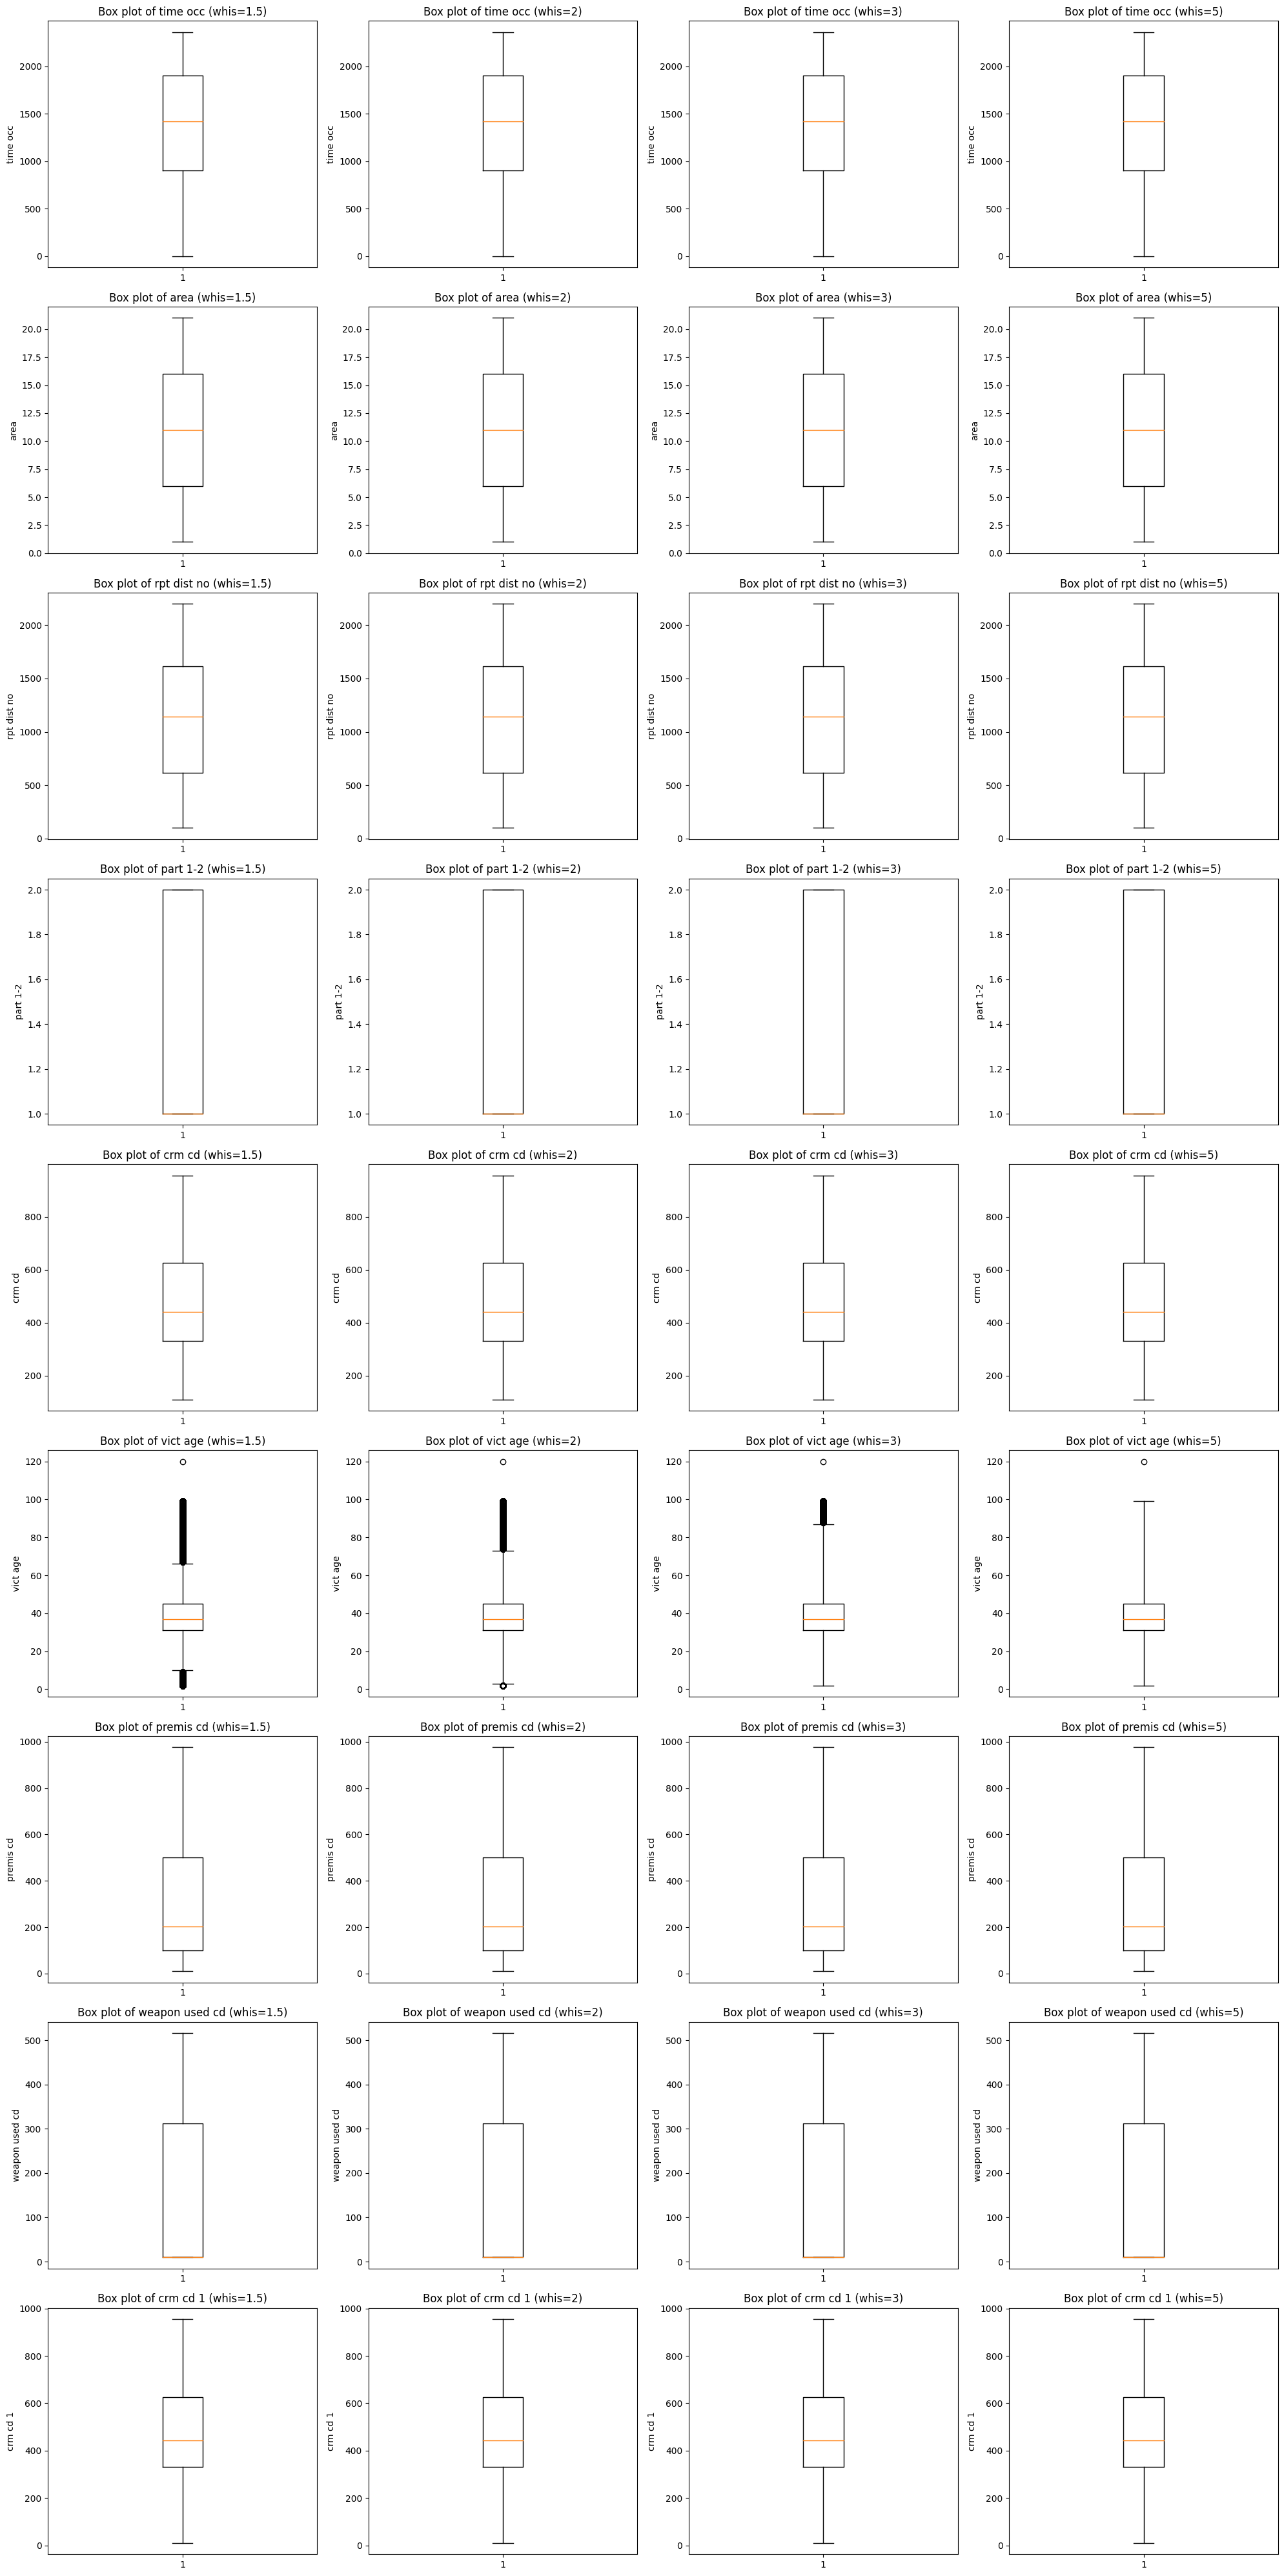

In [ ]:
# Dynamically select columns of type 'int64' and 'float64'
numerical_cols = crime_la.select_dtypes(include=['int64', 'float64']).columns

# Whisker values to test
whis_values = [1.5, 2, 3, 5]

# Create figure and axes for the subplots
fig, axes = plt.subplots(nrows=len(numerical_cols), ncols=len(whis_values), figsize=(20, 40))

for i, col in enumerate(numerical_cols):
    for j, whis in enumerate(whis_values):
        axes[i, j].boxplot(crime_la[col], whis=whis)  # Set whis value here
        axes[i, j].set_title(f"Box plot of {col} (whis={whis})")
        axes[i, j].set_ylabel(col)

plt.tight_layout()
plt.show()

For victim age

If the outliers are meaningful and part of the natural variability in the data, it might be best to keep them. For instance, if the age data represents real victims, even high or low ages can be crucial for understanding certain crime patterns.

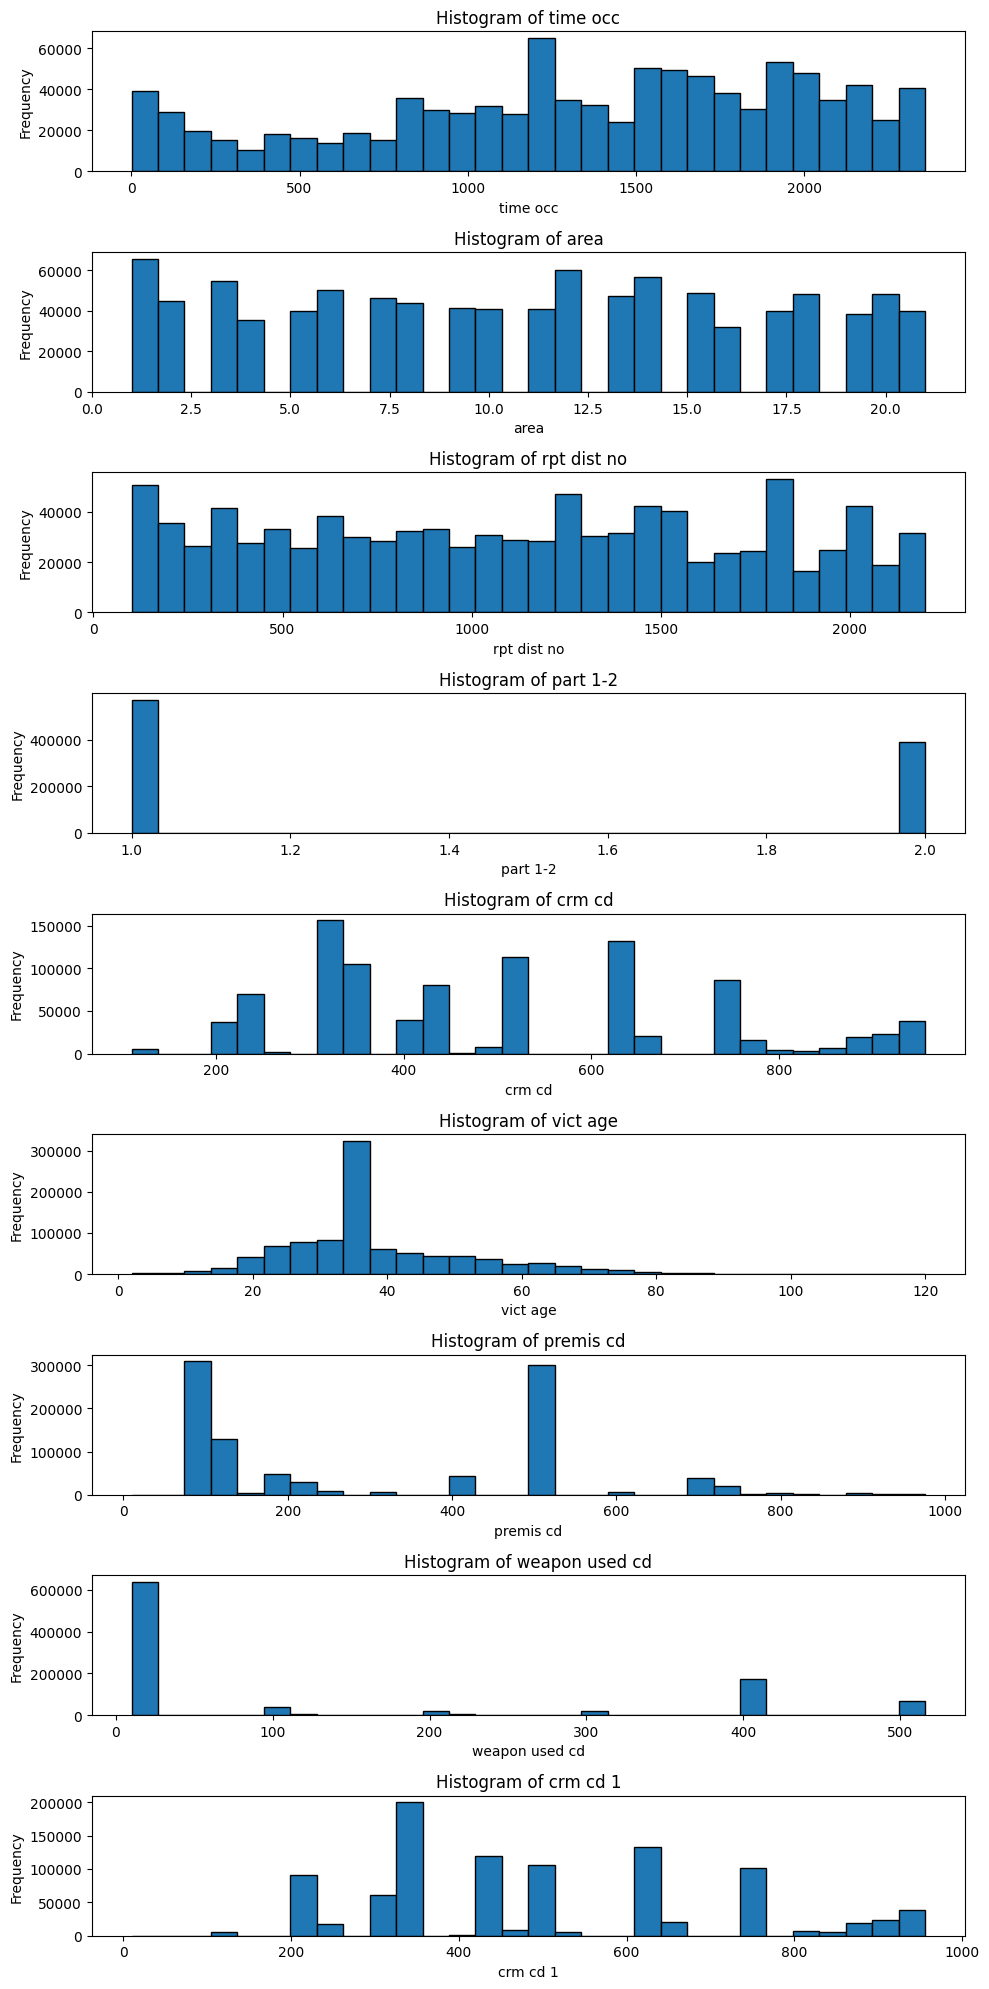

In [ ]:
# Create a figure and axis for the plots
fig, axes = plt.subplots(nrows=len(numerical_cols), figsize=(10, 20))

# Generate a histogram for each numerical column
for i, col in enumerate(numerical_cols):
    axes[i].hist(crime_la[col], bins=30, edgecolor='black')
    axes[i].set_title(f"Histogram of {col}")
    axes[i].set_ylabel('Frequency')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()

### Statistical methods to detect outliers


#### z-score


In [ ]:

# Loop through each numerical column
for col in numerical_cols:
    print(f"\nAnalyzing column: {col}")
    z_scores = zscore(crime_la[col])

    for threshold in range(1, 5):
        outliers = np.where(z_scores > threshold)
        num_outliers = len(outliers[0])

        print(f"Threshold: {threshold}")
        print(f"Indices of outliers: {outliers}")
        print(f"Number of outliers: {num_outliers}")


Analyzing column: time occ
Threshold: 1
Indices of outliers: (array([     0,      3,      5, ..., 962994, 962997, 963001]),)
Number of outliers: 190067
Threshold: 2
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 3
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 4
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0

Analyzing column: area
Threshold: 1
Indices of outliers: (array([     5,      9,     10, ..., 963001, 963002, 963004]),)
Number of outliers: 214729
Threshold: 2
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 3
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0
Threshold: 4
Indices of outliers: (array([], dtype=int64),)
Number of outliers: 0

Analyzing column: rpt dist no
Threshold: 1
Indices of outliers: (array([     5,      9,     10, ..., 963001, 963002, 963004]),)
Number of outliers: 206717
Threshold: 2
Indices of outliers: (array([], dtype

#### Tukey

In [ ]:
# Function to detect outliers using Tukey's method
def detect_outliers_tukey(column, thresholds):
    q75, q25 = np.percentile(column, [75, 25])
    iqr = q75 - q25

    results = []
    for threshold in thresholds:
        min_val = q25 - (iqr * threshold)
        max_val = q75 + (iqr * threshold)
        outliers = np.where((column > max_val) | (column < min_val))
        num_outliers = len(outliers[0])
        results.append((threshold, num_outliers, outliers))
    return results

# Threshold values to check
thresholds = np.arange(1, 5, 0.5)

# Loop through each numerical column and detect outliers
for col in numerical_cols:
    print(f"\nAnalyzing column: {col}")
    results = detect_outliers_tukey(crime_la[col], thresholds)

    for threshold, num_outliers, outliers in results:
        print(f"Threshold: {threshold}")
        print(f"Number of outliers: {num_outliers}")
        print(f"Indices of outliers: {outliers}")


Analyzing column: time occ
Threshold: 1.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 1.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 3.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 3.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 4.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 4.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)

Analyzing column: area
Threshold: 1.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 1.5
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.0
Number of outliers: 0
Indices of outliers: (array([], dtype=int64),)
Threshold: 2.5
Number of

BEFORE TREATING OUTLIERS DO WE EVEN NEED THIS COLUMNS?


In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       963006 non-null  object 
 1   date occ        963006 non-null  object 
 2   time occ        963006 non-null  int64  
 3   area            963006 non-null  int64  
 4   area name       963006 non-null  object 
 5   rpt dist no     963006 non-null  int64  
 6   part 1-2        963006 non-null  int64  
 7   crm cd          963006 non-null  int64  
 8   crm cd desc     963006 non-null  object 
 9   vict age        963006 non-null  float64
 10  vict sex        963006 non-null  object 
 11  vict descent    963006 non-null  object 
 12  premis cd       963006 non-null  float64
 13  premis desc     963006 non-null  object 
 14  weapon used cd  963006 non-null  float64
 15  weapon desc     963006 non-null  object 
 16  status          963006 non-null  object 
 17  status des

In [ ]:
# almost the same to crm cd 1
print(crime_la['crm cd'].head(5))

0    510
1    330
2    480
3    343
4    354
Name: crm cd, dtype: int64


In [ ]:
print(crime_la['premis cd'].head(5))

0    101.0
1    128.0
2    502.0
3    405.0
4    102.0
Name: premis cd, dtype: float64


Because these columns are codes that we dont know we will drop them

In [ ]:
# Drop the specified columns
columns_to_drop = ['crm cd', 'premis cd', 'crm cd 1']
crime_la = crime_la.drop(columns=columns_to_drop)

In [ ]:
# Drop the specified column we dont have info what this means
columns_to_drop = ['part 1-2']
crime_la = crime_la.drop(columns=columns_to_drop)

In [ ]:
# Verify the columns have been dropped
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date rptd       963006 non-null  object 
 1   date occ        963006 non-null  object 
 2   time occ        963006 non-null  int64  
 3   area            963006 non-null  int64  
 4   area name       963006 non-null  object 
 5   rpt dist no     963006 non-null  int64  
 6   crm cd desc     963006 non-null  object 
 7   vict age        963006 non-null  float64
 8   vict sex        963006 non-null  object 
 9   vict descent    963006 non-null  object 
 10  premis desc     963006 non-null  object 
 11  weapon used cd  963006 non-null  float64
 12  weapon desc     963006 non-null  object 
 13  status          963006 non-null  object 
 14  status desc     963006 non-null  object 
 15  location        963006 non-null  object 
 16  cross street    963006 non-null  object 
dtypes: float64

In [ ]:
# Get basic statistics for numerical columns
print(crime_la.describe())

# Get statistics for categorical columns
print(crime_la.describe(include=['object']))

            time occ           area    rpt dist no       vict age  \
count  963006.000000  963006.000000  963006.000000  963006.000000   
mean     1338.511749      10.712636    1117.702063      38.888213   
std       652.008017       6.102611     610.332012      13.477805   
min         1.000000       1.000000     101.000000       2.000000   
25%       900.000000       6.000000     615.000000      31.000000   
50%      1420.000000      11.000000    1141.000000      37.000000   
75%      1900.000000      16.000000    1617.000000      45.000000   
max      2359.000000      21.000000    2199.000000     120.000000   

       weapon used cd  
count   963006.000000  
mean       129.518003  
std        182.101812  
min         10.000000  
25%         10.000000  
50%         10.000000  
75%        312.000000  
max        516.000000  
                     date rptd                date occ area name  \
count                   963006                  963006    963006   
unique                    

CAPPING

In [ ]:
# 100 FOR WEAPON USED is unknown BECUASE OULIERS
# Replace placeholder values with more reasonable values
crime_la['weapon used cd'] = crime_la['weapon used cd'].replace(10, 100)

# Verify the changes
print(crime_la[['vict age', 'weapon used cd']].describe())

            vict age  weapon used cd
count  963006.000000   963006.000000
mean       38.888213      189.112118
std        13.477805      143.971975
min         2.000000      100.000000
25%        31.000000      100.000000
50%        37.000000      100.000000
75%        45.000000      312.000000
max       120.000000      516.000000


# Data Exploration (EDA)

Crime per year

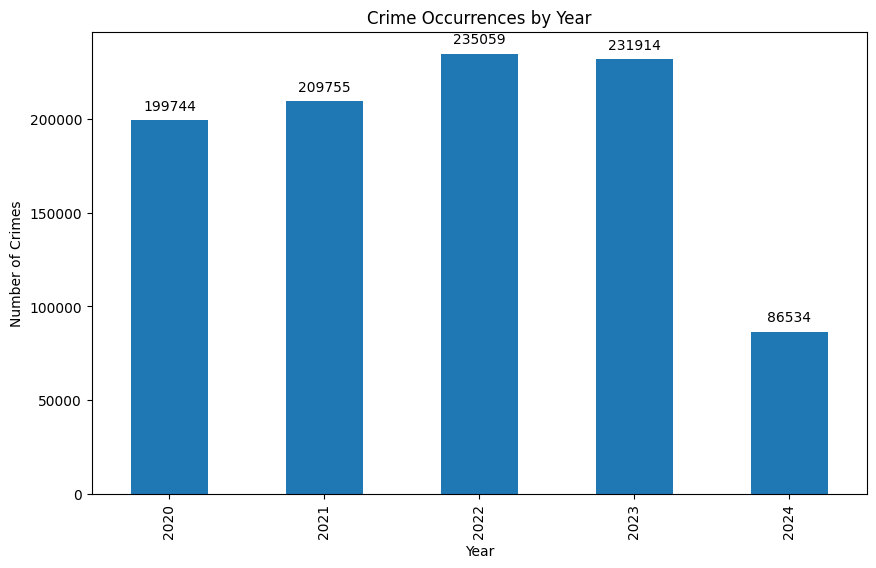

In [ ]:

# Convert 'date occ' to datetime, ensuring errors are coerced to NaT (Not a Time)
crime_la['date occ'] = pd.to_datetime(crime_la['date occ'], errors='coerce')

# Extract the year from 'date occ' after ensuring all dates are correctly converted
crime_la['year occ'] = crime_la['date occ'].dt.year

# Count the number of occurrences for each year
yearly_counts = crime_la['year occ'].value_counts().sort_index()

# Plot the data
plt.figure(figsize=(10, 6))
ax = yearly_counts.plot(kind='bar')
plt.title('Crime Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

Crime per day

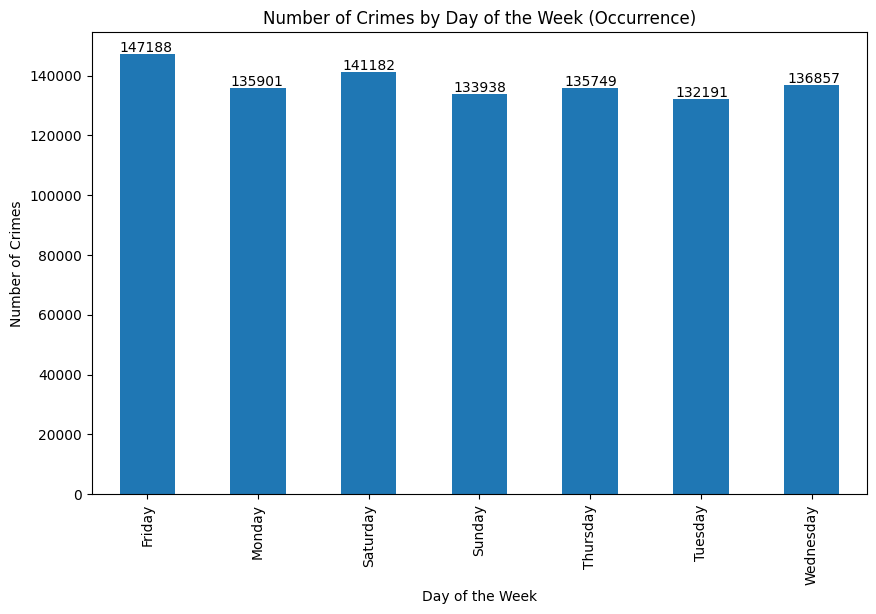

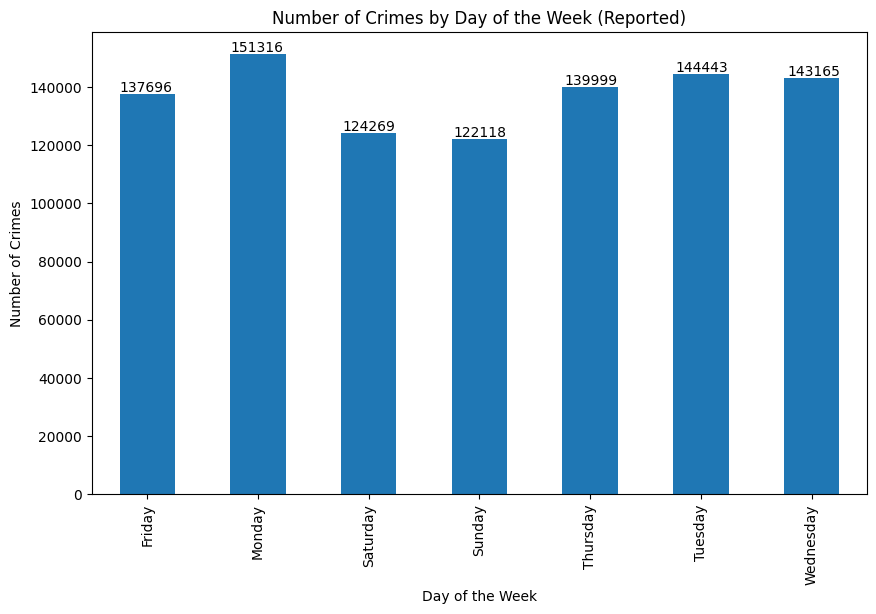

In [ ]:
# Convert 'date_occ' and 'date_rptd' to datetime
crime_la['date occ'] = pd.to_datetime(crime_la['date occ'])
crime_la['date rptd'] = pd.to_datetime(crime_la['date rptd'])

# Extract day of the week
crime_la['day occ'] = crime_la['date occ'].dt.day_name()
crime_la['day rptd'] = crime_la['date rptd'].dt.day_name()

# Calculate the difference in days
crime_la['days diff'] = (crime_la['date rptd'] - crime_la['date occ']).dt.days

# Plot crimes based on the day of the week they occurred
plt.figure(figsize=(10, 6))
ax = crime_la['day occ'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Crimes by Day of the Week (Occurrence)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()

# Plot crimes based on the day of the week they were reported
plt.figure(figsize=(10, 6))
ax = crime_la['day rptd'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Crimes by Day of the Week (Reported)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


<Figure size 1200x800 with 0 Axes>

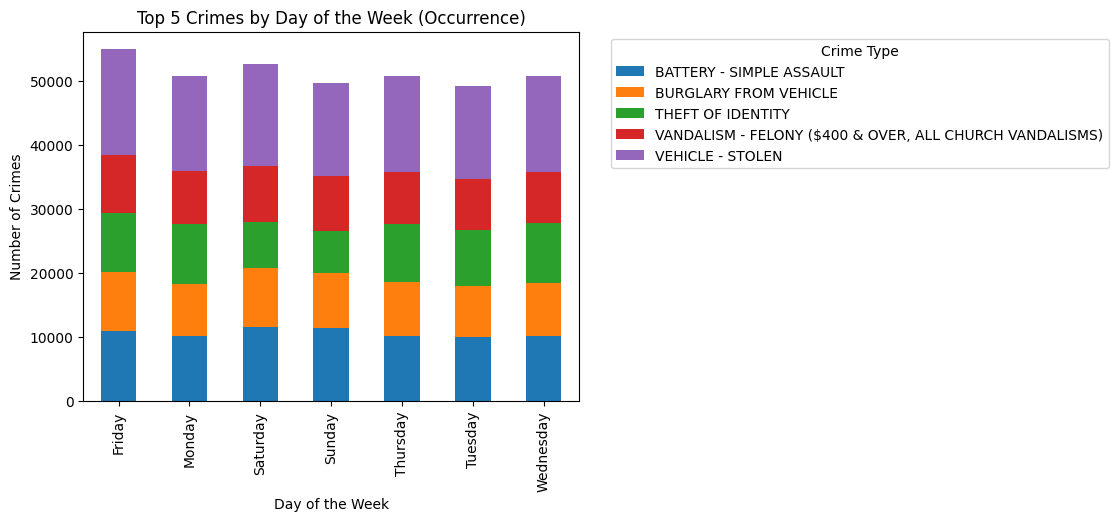

In [ ]:
# Identify the top 5 most frequent crime types
top_5_crimes = crime_la['crm cd desc'].value_counts().nlargest(5).index

# Filter the DataFrame to include only the top 5 crime types
filtered_crime_la = crime_la[crime_la['crm cd desc'].isin(top_5_crimes)]

# Plot crime types based on the day of the week they occurred
plt.figure(figsize=(12, 8))
filtered_crime_la.groupby(['day occ', 'crm cd desc']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Top 5 Crimes by Day of the Week (Occurrence)')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crimes')
plt.legend(title='Crime Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Varible days diff, has the difference between day ocurred and day reported


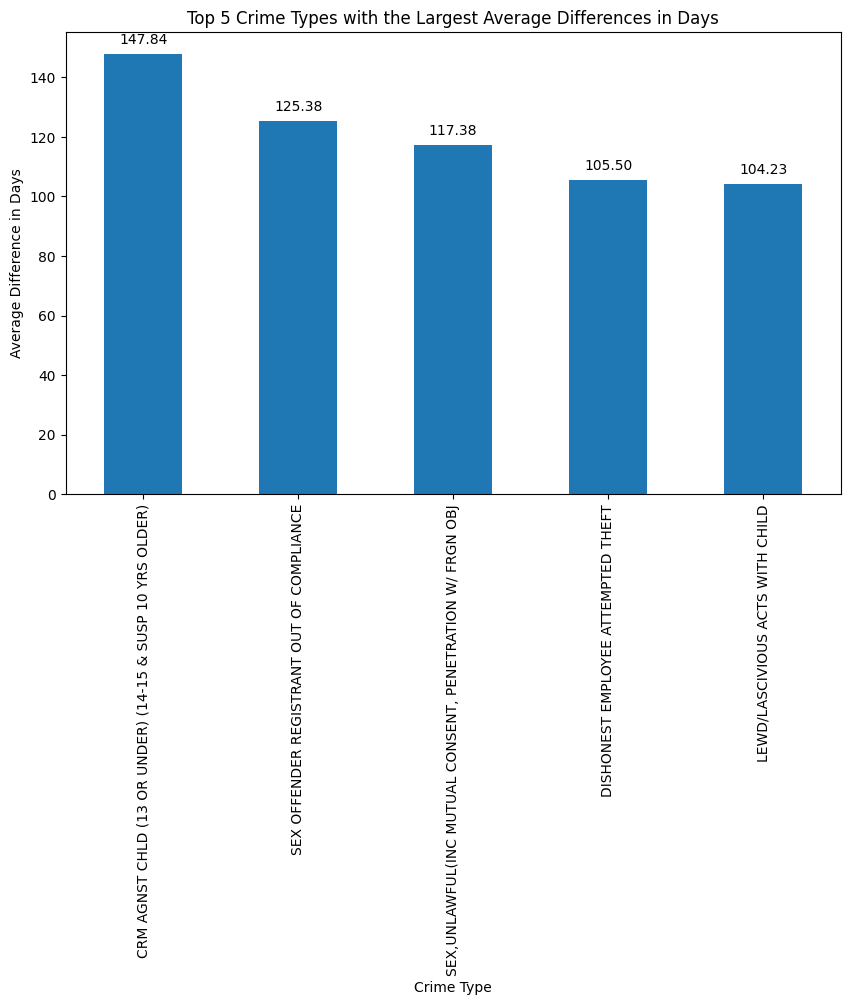

In [ ]:
# Calculate the average difference in days for each crime type
avg_days_diff = crime_la.groupby('crm cd desc')['days diff'].mean()

# Identify the top 5 crime types with the largest average differences
top_5_days_diff = avg_days_diff.nlargest(5)

# Plot the top 5 crime types with the largest average differences
plt.figure(figsize=(10, 6))
ax = top_5_days_diff.plot(kind='bar')
plt.title('Top 5 Crime Types with the Largest Average Differences in Days')
plt.xlabel('Crime Type')
plt.ylabel('Average Difference in Days')

# Add labels on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()


In [ ]:
top_5_days_diff

,days diff
crm cd desc,
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER),147.839954
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,125.381894
"SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ",117.377820
DISHONEST EMPLOYEE ATTEMPTED THEFT,105.500000
LEWD/LASCIVIOUS ACTS WITH CHILD,104.229885


In [ ]:
# Count the number of cases per crime type for the top 5 categories
top_5_counts = crime_la[crime_la['crm cd desc'].isin(top_5_days_diff.index)].groupby('crm cd desc').size()

# Display the counts
print(top_5_counts)

crm cd desc
CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)    1737
DISHONEST EMPLOYEE ATTEMPTED THEFT                             4
LEWD/LASCIVIOUS ACTS WITH CHILD                               87
SEX OFFENDER REGISTRANT OUT OF COMPLIANCE                    961
SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ    1064
dtype: int64


## Univariate

In [ ]:
crime_la.head()

,date rptd,date occ,time occ,area,area name,rpt dist no,crm cd desc,vict age,vict sex,vict descent,...,weapon used cd,weapon desc,status,status desc,location,cross street,year occ,day occ,day rptd,days diff
0,2020-03-01,2020-03-01,2130,7,Wilshire,784,VEHICLE - STOLEN,37.0,M,O,...,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,2020,Sunday,Sunday,0
1,2020-02-09,2020-02-08,1800,1,Central,182,BURGLARY FROM VEHICLE,47.0,M,O,...,100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,2020,Saturday,Sunday,1
2,2020-11-11,2020-11-04,1700,3,Southwest,356,BIKE - STOLEN,19.0,X,X,...,100.0,X,IC,Invest Cont,1400 W 37TH ST,X,2020,Wednesday,Wednesday,7
3,2023-05-10,2020-03-10,2037,9,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,...,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,2020,Tuesday,Wednesday,1156
4,2022-08-18,2020-08-17,1200,6,Hollywood,666,THEFT OF IDENTITY,28.0,M,H,...,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,2020,Monday,Thursday,731


We will use only the date of the ocurrence not the date reported

In [ ]:
# Drop the column
crime_la = crime_la.drop(columns=['date rptd'])

In [ ]:
# Remove time component and keep only date
crime_la['date occ'] = pd.to_datetime(crime_la['date occ']).dt.date

# Convert back to datetime to use dt accessor
crime_la['date occ'] = pd.to_datetime(crime_la['date occ'])

In [ ]:
# Extract year, month, and day into separate columns
crime_la['year'] = crime_la['date occ'].dt.year
crime_la['month'] = crime_la['date occ'].dt.month
crime_la['day'] = crime_la['date occ'].dt.day

# Verify the changes
print(crime_la[['date occ', 'year', 'month', 'day']].head())

    date occ  year  month  day
0 2020-03-01  2020      3    1
1 2020-02-08  2020      2    8
2 2020-11-04  2020     11    4
3 2020-03-10  2020      3   10
4 2020-08-17  2020      8   17


In [ ]:
crime_la

,date occ,time occ,area,area name,rpt dist no,crm cd desc,vict age,vict sex,vict descent,premis desc,...,status desc,location,cross street,year occ,day occ,day rptd,days diff,year,month,day
0,2020-03-01,2130,7,Wilshire,784,VEHICLE - STOLEN,37.0,M,O,STREET,...,Adult Arrest,1900 S LONGWOOD AV,X,2020,Sunday,Sunday,0,2020,3,1
1,2020-02-08,1800,1,Central,182,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),...,Invest Cont,1000 S FLOWER ST,X,2020,Saturday,Sunday,1,2020,2,8
2,2020-11-04,1700,3,Southwest,356,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,Invest Cont,1400 W 37TH ST,X,2020,Wednesday,Wednesday,7,2020,11,4
3,2020-03-10,2037,9,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,...,Invest Cont,14000 RIVERSIDE DR,X,2020,Tuesday,Wednesday,1156,2020,3,10
4,2020-08-17,1200,6,Hollywood,666,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,...,Invest Cont,1900 TRANSIENT,X,2020,Monday,Thursday,731,2020,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,2330,21,Topanga,2103,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,...,Invest Cont,22700 NAPA ST,X,2024,Saturday,Tuesday,3,2024,2,17
963002,2024-01-16,1510,20,Olympic,2013,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,...,Invest Cont,HOBART BL,3RD ST,2024,Tuesday,Tuesday,0,2024,1,16
963003,2024-01-15,100,1,Central,101,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,...,Invest Cont,1300 W SUNSET BL,X,2024,Monday,Monday,0,2024,1,15
963004,2024-07-19,757,17,Devonshire,1751,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,...,Invest Cont,10000 OLD DEPOT PLAZA RD,X,2024,Friday,Friday,0,2024,7,19


In [ ]:
# Drop the column
crime_la = crime_la.drop(columns=['year occ'])

In [ ]:
# Drop the column
crime_la = crime_la.drop(columns=['day rptd'])

In [ ]:
# Drop the column
crime_la = crime_la.drop(columns=['days diff'])

In [ ]:
crime_la

,date occ,time occ,area,area name,rpt dist no,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street,day occ,year,month,day
0,2020-03-01,2130,7,Wilshire,784,VEHICLE - STOLEN,37.0,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,Sunday,2020,3,1
1,2020-02-08,1800,1,Central,182,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,Saturday,2020,2,8
2,2020-11-04,1700,3,Southwest,356,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X,Wednesday,2020,11,4
3,2020-03-10,2037,9,Van Nuys,964,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,Tuesday,2020,3,10
4,2020-08-17,1200,6,Hollywood,666,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,Monday,2020,8,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,2330,21,Topanga,2103,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,100.0,X,IC,Invest Cont,22700 NAPA ST,X,Saturday,2024,2,17
963002,2024-01-16,1510,20,Olympic,2013,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,3RD ST,Tuesday,2024,1,16
963003,2024-01-15,100,1,Central,101,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,X,Monday,2024,1,15
963004,2024-07-19,757,17,Devonshire,1751,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,100.0,X,IC,Invest Cont,10000 OLD DEPOT PLAZA RD,X,Friday,2024,7,19


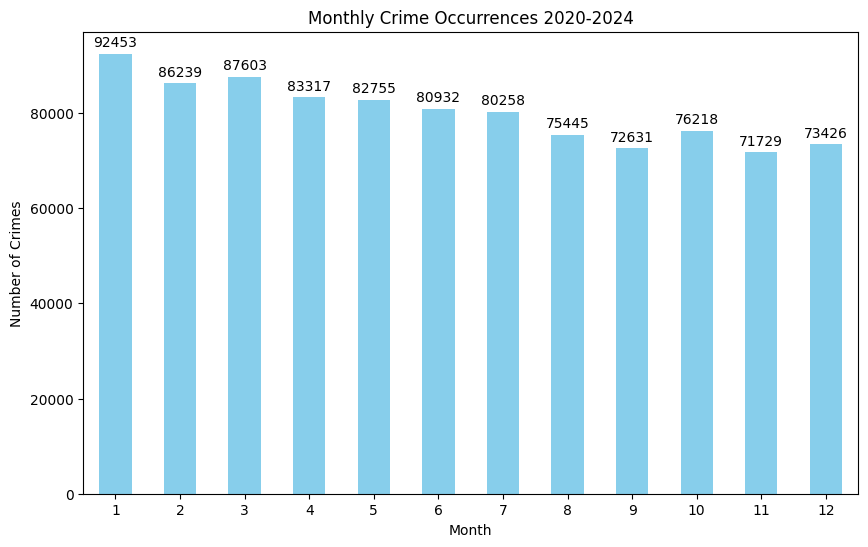

In [ ]:
# Group by month and count occurrences
monthly_counts = crime_la['month'].value_counts().sort_index()

# Plot the monthly crime counts
plt.figure(figsize=(10, 6))
bars = monthly_counts.plot(kind='bar', color='skyblue')

# Annotate bars with counts
for bar in bars.containers[0]:
    bars.annotate(
        format(bar.get_height(), '.0f'),
        (bar.get_x() + bar.get_width() / 2, bar.get_height()),
        ha='center', va='center',
        xytext=(0, 8),
        textcoords='offset points'
    )

plt.title('Monthly Crime Occurrences 2020-2024')
plt.xlabel('Month')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=0)
plt.show()

The bar plot illustrates the number of **crimes per month from 2020 to 2024**. It shows a relatively **consistent distribution of crimes across the months**, with a slight **peak in January** and a gradual decrease towards the middle of the year. The number of **crimes** ranges from around **70,000 to 95,000 each month**, with January having the highest occurrence and a noticeable dip in the months like August and September. The consistent height of the bars indicates that crime occurrences are fairly evenly distributed throughout the years, without extreme fluctuations.

In [ ]:
# Group by year and count occurrences
yearly_counts = crime_la['year'].value_counts().sort_index()

# Calculate the average number of crimes per year
average_crimes_per_year = yearly_counts.mean()

# Print the average number of crimes per year
print(f"Average number of crimes per year: {average_crimes_per_year:.2f}")

# Optional: Print the yearly counts to verify
print(yearly_counts)

Average number of crimes per year: 192601.20
year
2020    199744
2021    209755
2022    235059
2023    231914
2024     86534
Name: count, dtype: int64


2024 is significally different because we have info until Aug

## Visuals per column
time occ

area

vict age

weapon used cd

In [ ]:
# Dynamically select columns of type 'int64' and 'float64'
numerical_cols = crime_la.select_dtypes(include=['int64', 'float64']).columns
print(numerical_cols)

Index(['time occ', 'area', 'rpt dist no', 'vict age', 'weapon used cd'], dtype='object')


rpt dist no is a code that is not relevant for the study

In [ ]:
# Drop the 'rpt dist no' column
crime_la = crime_la.drop(columns=['rpt dist no'])

### time occ

Categorical variable but some stats still work

In [ ]:
# stats
crime_la["time occ"].describe()

,time occ
count,963006.000000
mean,1338.511749
std,652.008017
min,1.000000
25%,900.000000
50%,1420.000000
75%,1900.000000
max,2359.000000


The `time occ` column, representing crime occurrence times in a 24-hour format.

The **average crime time is approximately 1:38 PM**, with a high variability (standard deviation of 652 minutes) indicating that **crimes occur at various times throughout the day**. The distribution shows that **25% of crimes occur by 9:00 AM, 50% by 2:20 PM, and 75% by 7:00 PM**, suggesting an **increasing trend in crime occurrences as the day progresses**. Overall, crimes are distributed across the entire 24-hour period, highlighting the diverse timings of crime events.


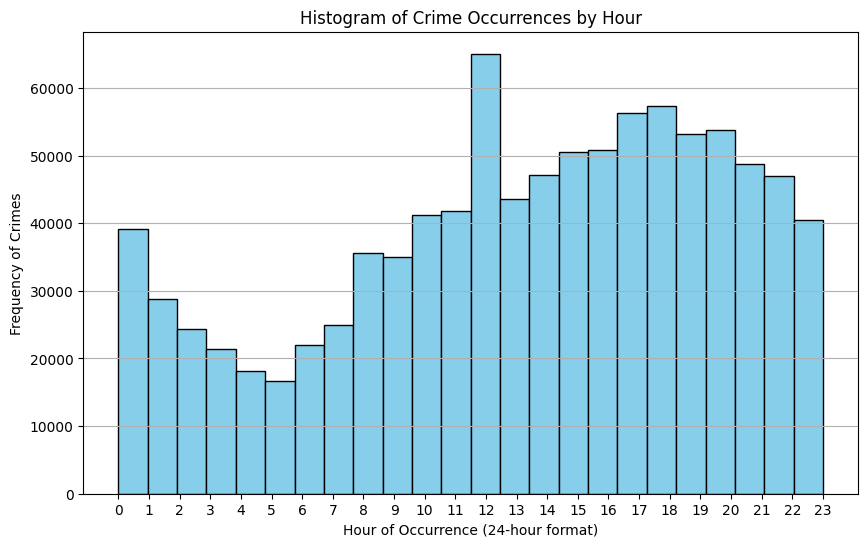

In [ ]:
# Ensure 'time occ' is correctly represented as HHMM
crime_la['time occ'] = crime_la['time occ'].astype(int)

# Extract the hour from 'time occ'
crime_la['hour'] = crime_la['time occ'] // 100

# Plot the histogram of occurrences per hour
plt.figure(figsize=(10, 6))
plt.hist(crime_la['hour'], bins=24, color='skyblue', edgecolor='black')
plt.title("Histogram of Crime Occurrences by Hour")
plt.xlabel("Hour of Occurrence (24-hour format)")
plt.ylabel("Frequency of Crimes")
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

In [ ]:
# Display all unique values in the 'time occ' column
unique_times = crime_la['time occ'].unique()
print("Unique values in 'time occ':")
print(np.sort(unique_times))  # Sort the unique values for better readability

Unique values in 'time occ':
[   1    2    3 ... 2357 2358 2359]


In [ ]:
# Count occurrences of each hour
hour_counts = crime_la['hour'].value_counts().sort_index()

# Identify the hour with the most occurrences
most_frequent_hours = hour_counts[hour_counts == hour_counts.max()]

# Display the most frequent hours and their counts
print("Most frequent hours of occurrence and their counts:")
print(most_frequent_hours)

Most frequent hours of occurrence and their counts:
hour
12    65058
Name: count, dtype: int64


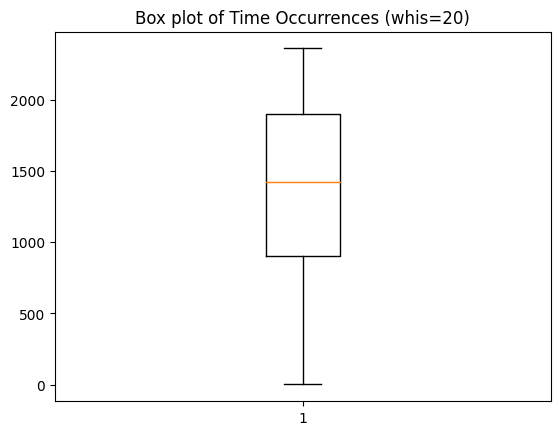

In [ ]:
plt.boxplot(crime_la["time occ"], whis=20)
plt.title("Box plot of Time Occurrences (whis=20)")
plt.show()

In [ ]:
# Display all unique values in the 'time occ' column
unique_times = crime_la['hour'].unique()
print("Unique values in 'hour':")
print(np.sort(unique_times))  # Sort the unique values for better readability

Unique values in 'hour':
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [ ]:
# Display the first 5 rows with 'time occ' and 'hour'
print(crime_la[['time occ', 'hour']].head())

   time occ  hour
0      2130    21
1      1800    18
2      1700    17
3      2037    20
4      1200    12


In [ ]:
# drop the original 'time occ' column if minute-level data is not needed
crime_la.drop(columns=['time occ'], inplace=True)

In [ ]:
crime_la

,date occ,area,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street,day occ,year,month,day,hour
0,2020-03-01,7,Wilshire,VEHICLE - STOLEN,37.0,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,Sunday,2020,3,1,21
1,2020-02-08,1,Central,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,Saturday,2020,2,8,18
2,2020-11-04,3,Southwest,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X,Wednesday,2020,11,4,17
3,2020-03-10,9,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,Tuesday,2020,3,10,20
4,2020-08-17,6,Hollywood,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,Monday,2020,8,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,21,Topanga,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,100.0,X,IC,Invest Cont,22700 NAPA ST,X,Saturday,2024,2,17,23
963002,2024-01-16,20,Olympic,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,3RD ST,Tuesday,2024,1,16,15
963003,2024-01-15,1,Central,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,X,Monday,2024,1,15,1
963004,2024-07-19,17,Devonshire,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,100.0,X,IC,Invest Cont,10000 OLD DEPOT PLAZA RD,X,Friday,2024,7,19,7


### area

In [ ]:
# Get unique values in 'area' column
unique_areas = crime_la['area'].unique()
print(unique_areas)

[ 7  1  3  9  6 18 13 19  2 10  8 20  4 21 11 12 14 15  5 16 17]


**Categorical variable** so stats irrelevant

https://lapdonlinestrgeacc.blob.core.usgovcloudapi.net/lapdonlinemedia/2021/09/citywide.pdf

In [ ]:
# found the code area meanings
# Dictionary to map area codes to their respective text
area_mapping = {
    1: 'CENTRAL', 2: 'RAMPART', 3: 'SOUTHWEST', 4: 'HOLLENBECK', 5: 'HARBOR',
    6: 'HOLLYWOOD', 7: 'WILSHIRE', 8: 'WEST LA', 9: 'VAN NUYS', 10: 'WEST VALLEY',
    11: 'NORTHEAST', 12: '77TH', 13: 'NEWTON', 14: 'PACIFIC', 15: 'NORTH HOLLYWOOD',
    16: 'FOOTHILL', 17: 'DEVONSHIRE', 18: 'SOUTHEAST', 19: 'MISSION', 20: 'OLYMPIC',
    21: 'TOPANGA'
}

# Replace area codes with their respective text
crime_la['area name'] = crime_la['area'].map(area_mapping)

# Verify the changes
print(crime_la[['area', 'area name']].head())

   area  area name
0     7   WILSHIRE
1     1    CENTRAL
2     3  SOUTHWEST
3     9   VAN NUYS
4     6  HOLLYWOOD


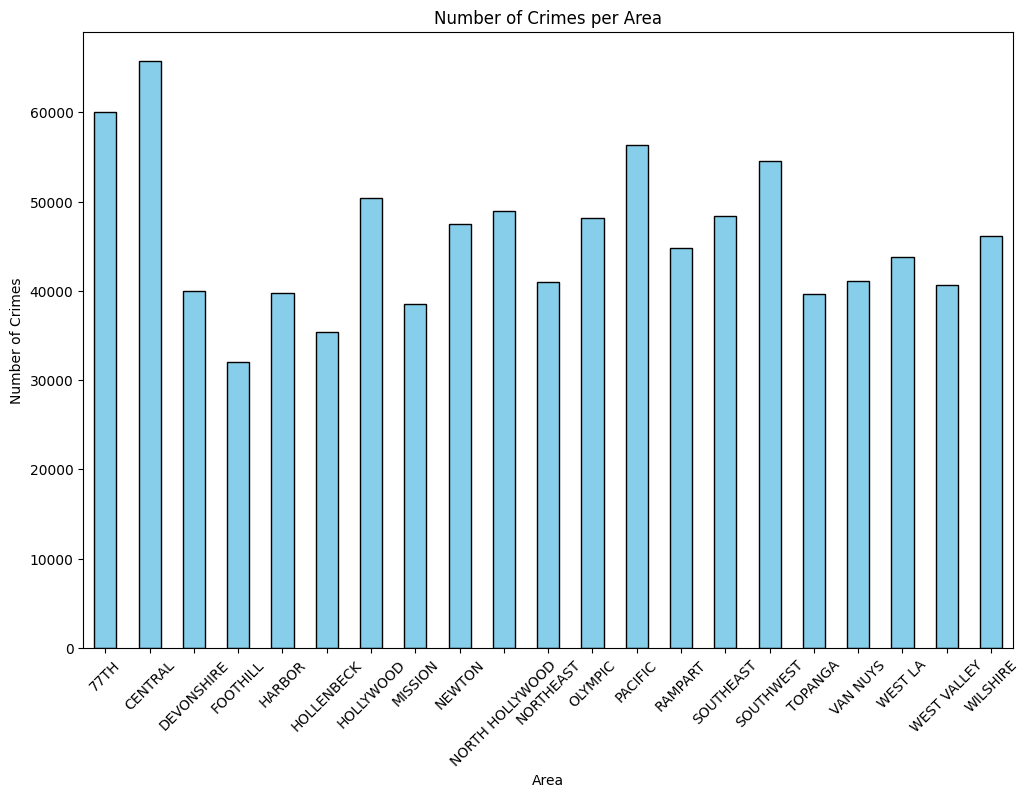

In [ ]:
# Group by 'area name' and count occurrences
area_counts = crime_la['area name'].value_counts().sort_index()

# Plot the counts per area
plt.figure(figsize=(12, 8))
area_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Crimes per Area')
plt.xlabel('Area')
plt.ylabel('Number of Crimes')
plt.xticks(rotation=45)
plt.show()

The **"77th" and "Central" areas show notably high crime rates**, suggesting a need for focused crime prevention strategies in these areas. Overall, the chart highlights significant variation in crime rates across different areas, which could be critical for law enforcement and community planners in prioritizing and tailoring their safety measures.

In [ ]:
crime_la

,date occ,area,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street,day occ,year,month,day,hour
0,2020-03-01,7,WILSHIRE,VEHICLE - STOLEN,37.0,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,Sunday,2020,3,1,21
1,2020-02-08,1,CENTRAL,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,Saturday,2020,2,8,18
2,2020-11-04,3,SOUTHWEST,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X,Wednesday,2020,11,4,17
3,2020-03-10,9,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,Tuesday,2020,3,10,20
4,2020-08-17,6,HOLLYWOOD,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,Monday,2020,8,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,21,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,100.0,X,IC,Invest Cont,22700 NAPA ST,X,Saturday,2024,2,17,23
963002,2024-01-16,20,OLYMPIC,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,3RD ST,Tuesday,2024,1,16,15
963003,2024-01-15,1,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,X,Monday,2024,1,15,1
963004,2024-07-19,17,DEVONSHIRE,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,100.0,X,IC,Invest Cont,10000 OLD DEPOT PLAZA RD,X,Friday,2024,7,19,7


In [ ]:
# Drop the 'area' column
crime_la = crime_la.drop(columns=['area'])

### vict age

In [ ]:
# Get basic statistics for 'vict age' without the placeholders
vict_age_stats = crime_la['vict age'].describe()
vict_age_stats

,vict age
count,963006.000000
mean,38.888213
std,13.477805
min,2.000000
25%,31.000000
50%,37.000000
75%,45.000000
max,120.000000


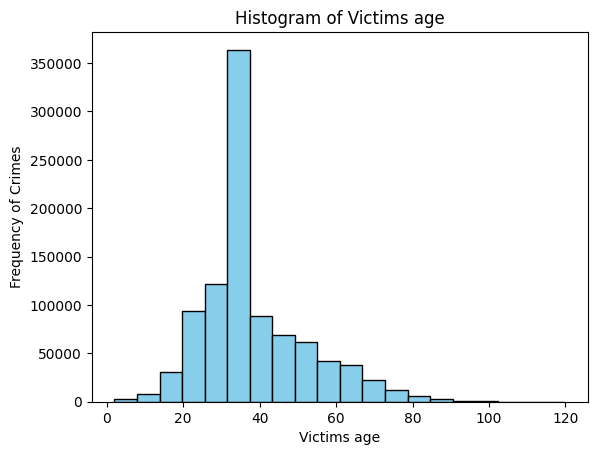

In [ ]:
# Plot the histogram
plt.hist(crime_la['vict age'], bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram of Victims age")
plt.xlabel("Victims age")
plt.ylabel("Frequency of Crimes")
plt.show()

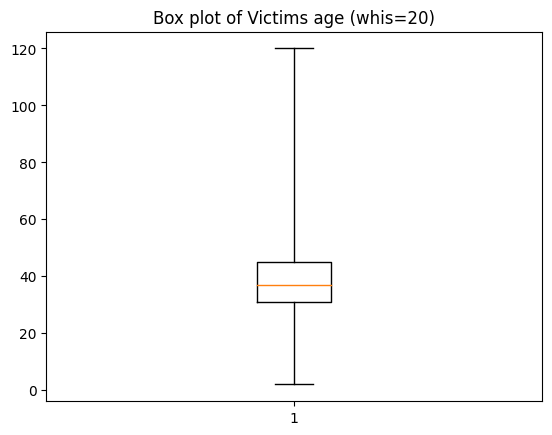

In [ ]:
plt.boxplot(crime_la['vict age'], whis=20)
plt.title("Box plot of Victims age (whis=20)")
plt.show()

### weapon used cd

In [ ]:
crime_la

,date occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon used cd,weapon desc,status,status desc,location,cross street,day occ,year,month,day,hour
0,2020-03-01,WILSHIRE,VEHICLE - STOLEN,37.0,M,O,STREET,100.0,X,AA,Adult Arrest,1900 S LONGWOOD AV,X,Sunday,2020,3,1,21
1,2020-02-08,CENTRAL,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),100.0,X,IC,Invest Cont,1000 S FLOWER ST,X,Saturday,2020,2,8,18
2,2020-11-04,SOUTHWEST,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",100.0,X,IC,Invest Cont,1400 W 37TH ST,X,Wednesday,2020,11,4,17
3,2020-03-10,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,100.0,X,IC,Invest Cont,14000 RIVERSIDE DR,X,Tuesday,2020,3,10,20
4,2020-08-17,HOLLYWOOD,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,100.0,X,IC,Invest Cont,1900 TRANSIENT,X,Monday,2020,8,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,100.0,X,IC,Invest Cont,22700 NAPA ST,X,Saturday,2024,2,17,23
963002,2024-01-16,OLYMPIC,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,HOBART BL,3RD ST,Tuesday,2024,1,16,15
963003,2024-01-15,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,500.0,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,1300 W SUNSET BL,X,Monday,2024,1,15,1
963004,2024-07-19,DEVONSHIRE,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,100.0,X,IC,Invest Cont,10000 OLD DEPOT PLAZA RD,X,Friday,2024,7,19,7


weapon used cd is the code for weapon desc, so weapon used cd will be dropped

In [ ]:
# Drop the column
crime_la = crime_la.drop(columns=['weapon used cd'])

In [ ]:
# Drop the column wont be used for this study
crime_la = crime_la.drop(columns=['status'])

In [ ]:
# Drop the column wont be used for this study
crime_la = crime_la.drop(columns=['cross street'])

In [ ]:
crime_la

,date occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,day occ,year,month,day,hour
0,2020-03-01,WILSHIRE,VEHICLE - STOLEN,37.0,M,O,STREET,X,Adult Arrest,1900 S LONGWOOD AV,Sunday,2020,3,1,21
1,2020-02-08,CENTRAL,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),X,Invest Cont,1000 S FLOWER ST,Saturday,2020,2,8,18
2,2020-11-04,SOUTHWEST,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",X,Invest Cont,1400 W 37TH ST,Wednesday,2020,11,4,17
3,2020-03-10,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,X,Invest Cont,14000 RIVERSIDE DR,Tuesday,2020,3,10,20
4,2020-08-17,HOLLYWOOD,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,X,Invest Cont,1900 TRANSIENT,Monday,2020,8,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,X,Invest Cont,22700 NAPA ST,Saturday,2024,2,17,23
963002,2024-01-16,OLYMPIC,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,HOBART BL,Tuesday,2024,1,16,15
963003,2024-01-15,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL,Monday,2024,1,15,1
963004,2024-07-19,DEVONSHIRE,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,X,Invest Cont,10000 OLD DEPOT PLAZA RD,Friday,2024,7,19,7


## describe()

In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date occ      963006 non-null  datetime64[ns]
 1   area name     963006 non-null  object        
 2   crm cd desc   963006 non-null  object        
 3   vict age      963006 non-null  float64       
 4   vict sex      963006 non-null  object        
 5   vict descent  963006 non-null  object        
 6   premis desc   963006 non-null  object        
 7   weapon desc   963006 non-null  object        
 8   status desc   963006 non-null  object        
 9   location      963006 non-null  object        
 10  day occ       963006 non-null  object        
 11  year          963006 non-null  int32         
 12  month         963006 non-null  int32         
 13  day           963006 non-null  int32         
 14  hour          963006 non-null  int64         
dtypes: datetime64[ns]

In [ ]:
# Descriptive statistics for all variables
crime_la.describe(include= 'all')

,date occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,day occ,year,month,day,hour
count,963006,963006,963006,963006.000000,963006,963006,963006,963006,963006,963006,963006,963006.000000,963006.000000,963006.000000,963006.000000
unique,NaN,21,139,NaN,3,19,307,80,6,65983,7,NaN,NaN,NaN,NaN
top,NaN,CENTRAL,VEHICLE - STOLEN,NaN,M,H,STREET,X,Invest Cont,800 N ALAMEDA ST,Friday,NaN,NaN,NaN,NaN
freq,NaN,65721,106420,NaN,391192,289523,246970,637661,768486,2133,147188,NaN,NaN,NaN,NaN
mean,2022-04-06 14:15:02.618674944,NaN,NaN,38.888213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.787892,6.242672,15.328525,13.207102
min,2020-01-01 00:00:00,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,1.000000,1.000000,0.000000
25%,2021-03-18 00:00:00,NaN,NaN,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.000000,3.000000,7.000000,9.000000
50%,2022-04-24 00:00:00,NaN,NaN,37.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022.000000,6.000000,15.000000,14.000000
75%,2023-05-02 00:00:00,NaN,NaN,45.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.000000,9.000000,23.000000,19.000000
max,2024-07-22 00:00:00,NaN,NaN,120.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.000000,12.000000,31.000000,23.000000


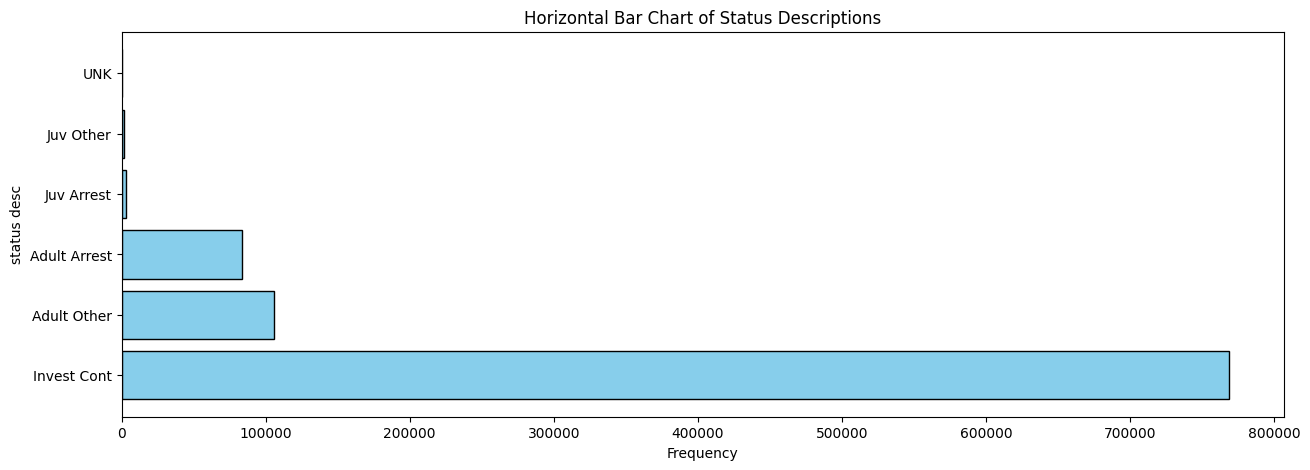

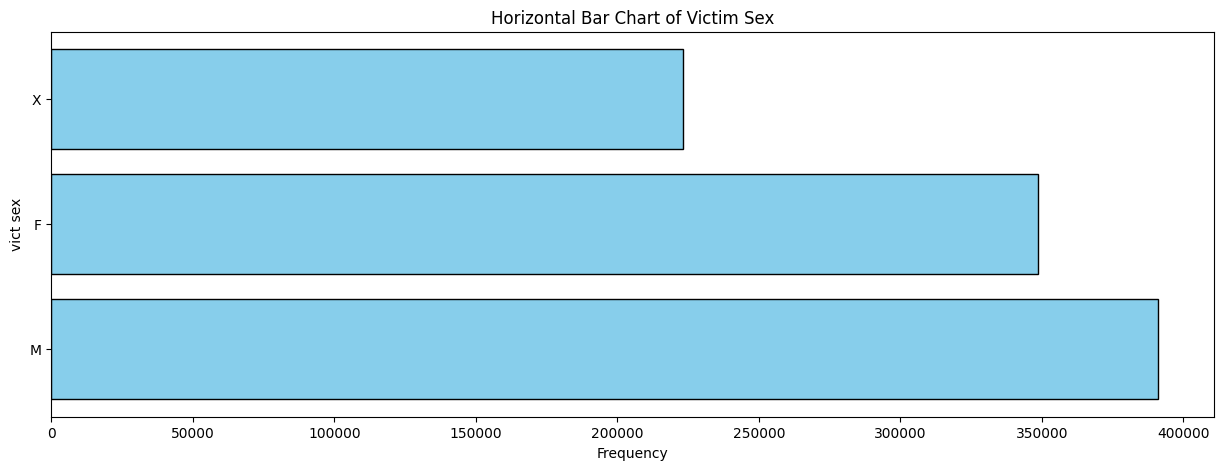

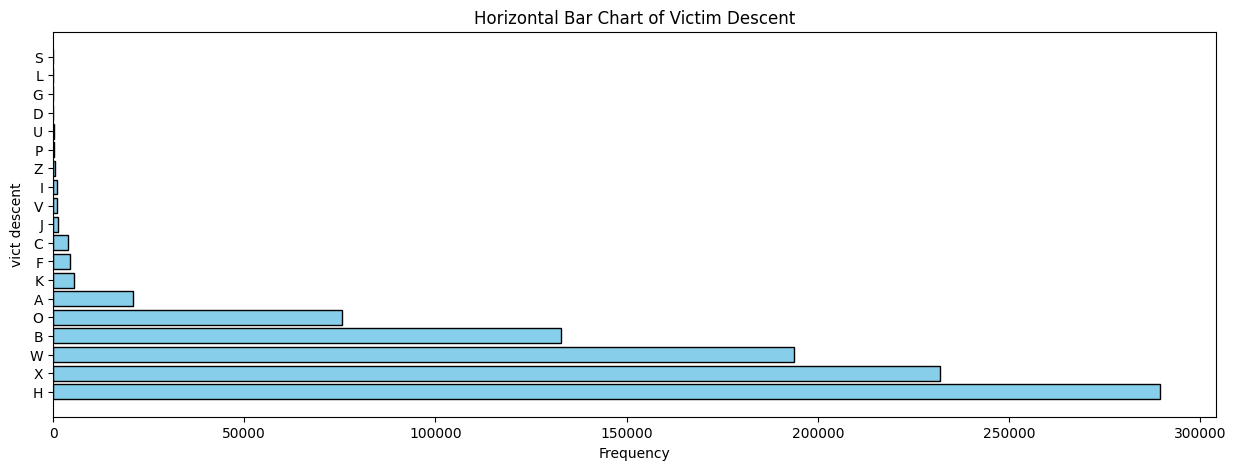

In [ ]:
# Plotting function
def plot_horizontal_bar(column_name, title):
    plt.figure(figsize=(15, 5))
    counts = crime_la[column_name].value_counts()
    plt.barh(counts.index, counts, color='skyblue', edgecolor='black')
    plt.title(f'Horizontal Bar Chart of {title}')
    plt.xlabel('Frequency')
    plt.ylabel(column_name)
    plt.show()

# Plot for each specified variable
plot_horizontal_bar('status desc', 'Status Descriptions')
plot_horizontal_bar('vict sex', 'Victim Sex')
plot_horizontal_bar('vict descent', 'Victim Descent')


Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

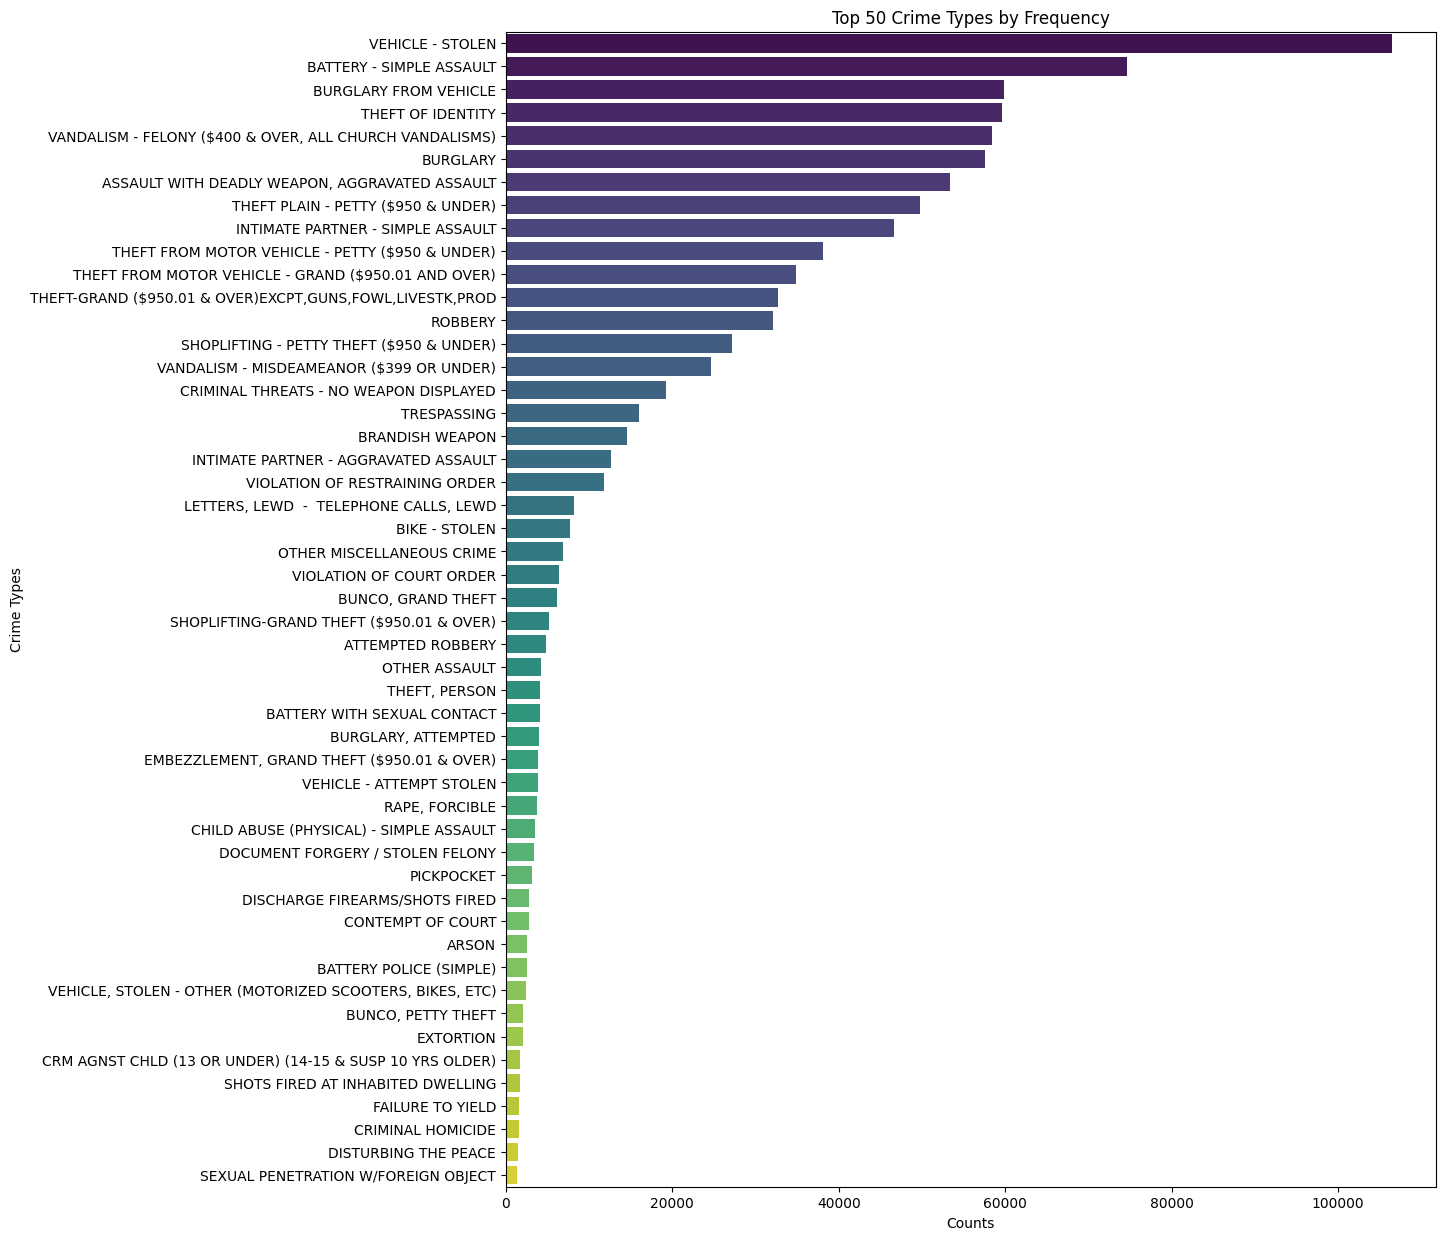

In [ ]:
# Count the occurrences of each crime type
crime_type_counts = crime_la['crm cd desc'].value_counts()

# Select the top 50 crime types
top_50_crime_types = crime_type_counts.head(50)

# Create a bar plot for the top 50 crime types
plt.figure(figsize=(12, 15))
sns.barplot(x=top_50_crime_types.values, y=top_50_crime_types.index, palette='viridis')
plt.title('Top 50 Crime Types by Frequency')
plt.xlabel('Counts')
plt.ylabel('Crime Types')
plt.show()


## Bivariate analysis

In [ ]:
crime_la

,date occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,day occ,year,month,day,hour
0,2020-03-01,WILSHIRE,VEHICLE - STOLEN,37.0,M,O,STREET,X,Adult Arrest,1900 S LONGWOOD AV,Sunday,2020,3,1,21
1,2020-02-08,CENTRAL,BURGLARY FROM VEHICLE,47.0,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),X,Invest Cont,1000 S FLOWER ST,Saturday,2020,2,8,18
2,2020-11-04,SOUTHWEST,BIKE - STOLEN,19.0,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",X,Invest Cont,1400 W 37TH ST,Wednesday,2020,11,4,17
3,2020-03-10,VAN NUYS,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19.0,M,O,CLOTHING STORE,X,Invest Cont,14000 RIVERSIDE DR,Tuesday,2020,3,10,20
4,2020-08-17,HOLLYWOOD,THEFT OF IDENTITY,28.0,M,H,SIDEWALK,X,Invest Cont,1900 TRANSIENT,Monday,2020,8,17,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
963001,2024-02-17,TOPANGA,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),44.0,F,O,DRIVEWAY,X,Invest Cont,22700 NAPA ST,Saturday,2024,2,17,23
963002,2024-01-16,OLYMPIC,BATTERY - SIMPLE ASSAULT,80.0,F,O,BUS STOP,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,HOBART BL,Tuesday,2024,1,16,15
963003,2024-01-15,CENTRAL,VANDALISM - MISDEAMEANOR ($399 OR UNDER),37.0,X,X,HOTEL,UNKNOWN WEAPON/OTHER WEAPON,Invest Cont,1300 W SUNSET BL,Monday,2024,1,15,1
963004,2024-07-19,DEVONSHIRE,TRESPASSING,37.0,X,X,MTA - ORANGE LINE - CHATSWORTH,X,Invest Cont,10000 OLD DEPOT PLAZA RD,Friday,2024,7,19,7


In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   date occ      963006 non-null  datetime64[ns]
 1   area name     963006 non-null  object        
 2   crm cd desc   963006 non-null  object        
 3   vict age      963006 non-null  float64       
 4   vict sex      963006 non-null  object        
 5   vict descent  963006 non-null  object        
 6   premis desc   963006 non-null  object        
 7   weapon desc   963006 non-null  object        
 8   status desc   963006 non-null  object        
 9   location      963006 non-null  object        
 10  day occ       963006 non-null  object        
 11  year          963006 non-null  int32         
 12  month         963006 non-null  int32         
 13  day           963006 non-null  int32         
 14  hour          963006 non-null  int64         
dtypes: datetime64[ns]

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

vict sex: X Unknown

In [ ]:
# Create crosstab of victim sex by victim descent
count_table = pd.crosstab(crime_la["vict sex"], crime_la["vict descent"])
print(count_table)

vict descent      A      B     C   D     F   G       H    I    J     K   L  \
vict sex                                                                     
F             10014  74578  1934  38  2090  35  145482  401  702  2513  45   
M             10802  58210  2088  45  2183  34  143826  530  712  2923  23   
X                12    157    17   1    65   0     215    5    3     7   1   

vict descent      O    P   S    U    V       W       X    Z  
vict sex                                                     
F             26535  143  26   86  569   81521    1584  191  
M             48899  121  26  116  498  111955    7888  313  
X               115    1   2    5    4     266  222449    2  


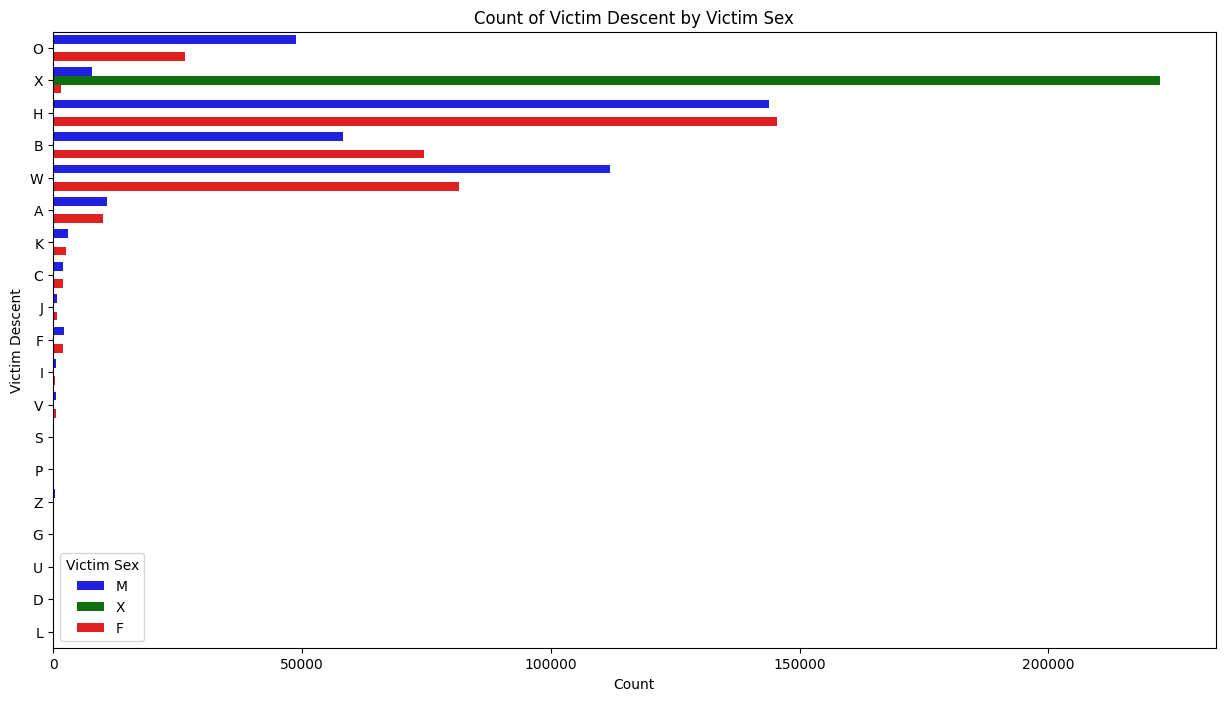

In [ ]:
# Plot counts for each combination of victim sex and victim descent
plt.figure(figsize=(15, 8))
sns.countplot(y="vict descent", hue="vict sex", data=crime_la, palette={"M": "blue", "F": "red", "X": "green"})
plt.title("Count of Victim Descent by Victim Sex")
plt.xlabel("Count")
plt.ylabel("Victim Descent")
plt.legend(title="Victim Sex")
plt.show()

In [ ]:
# Filter the DataFrame to exclude 'X' in vict sex
filtered_crime_la = crime_la[crime_la['vict sex'].isin(['M', 'F'])]

In [ ]:
# Create crosstab of victim sex by victim descent
count_table_filtered = pd.crosstab(filtered_crime_la["vict sex"], filtered_crime_la["vict descent"])

# Perform the chi-square test
chi2_result_filtered = stats.chisquare(count_table_filtered, axis=None)

# Display the result
print(chi2_result_filtered)

Power_divergenceResult(statistic=3030736.2495203996, pvalue=0.0)


## Putting the POTENTIAL target at the center

**Crime type == crm cd desc**

In [ ]:
crime_la['crm cd desc'].head(5)

,crm cd desc
0,VEHICLE - STOLEN
1,BURGLARY FROM VEHICLE
2,BIKE - STOLEN
3,SHOPLIFTING-GRAND THEFT ($950.01 & OVER)
4,THEFT OF IDENTITY


In [ ]:
# Check the number of unique values in the 'crm cd desc' column
unique_crime_types = crime_la['crm cd desc'].nunique()
print("Number of unique crime types:", unique_crime_types)

Number of unique crime types: 139


In [ ]:
# Display the unique crime types
print(crime_la['crm cd desc'].unique())

['VEHICLE - STOLEN' 'BURGLARY FROM VEHICLE' 'BIKE - STOLEN'
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)' 'THEFT OF IDENTITY'
 'BATTERY - SIMPLE ASSAULT'
 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH'
 'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)'
 'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ'
 'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT'
 'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD'
 'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)'
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)'
 'CHILD ANNOYING (17YRS & UNDER)' 'THEFT PLAIN - PETTY ($950 & UNDER)'
 'INTIMATE PARTNER - SIMPLE ASSAULT' 'LEWD CONDUCT'
 'THEFT PLAIN - ATTEMPT' 'BURGLARY'
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)' 'ROBBERY'
 'BUNCO, GRAND THEFT' 'BATTERY WITH SEXUAL CONTACT'
 'INTIMATE PARTNER - AGGRAVATED ASSAULT' 'ORAL COPULATION'
 'UNAUTHORIZED COMPUTER ACCESS' 'VIOLATION

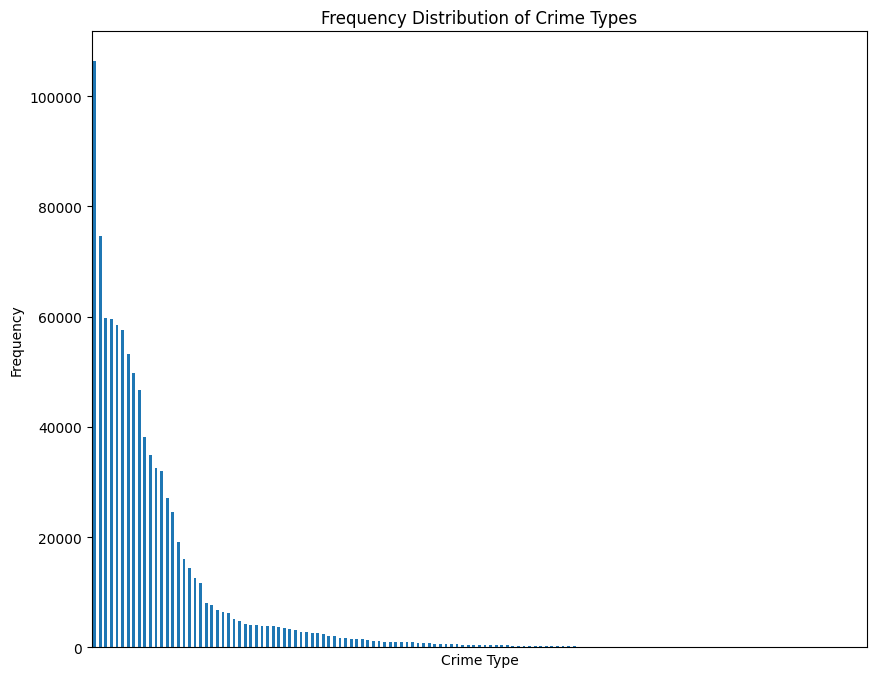

In [ ]:
plt.figure(figsize=(10, 8))
crime_type_counts.plot(kind='bar')
plt.title('Frequency Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks([])
plt.show()


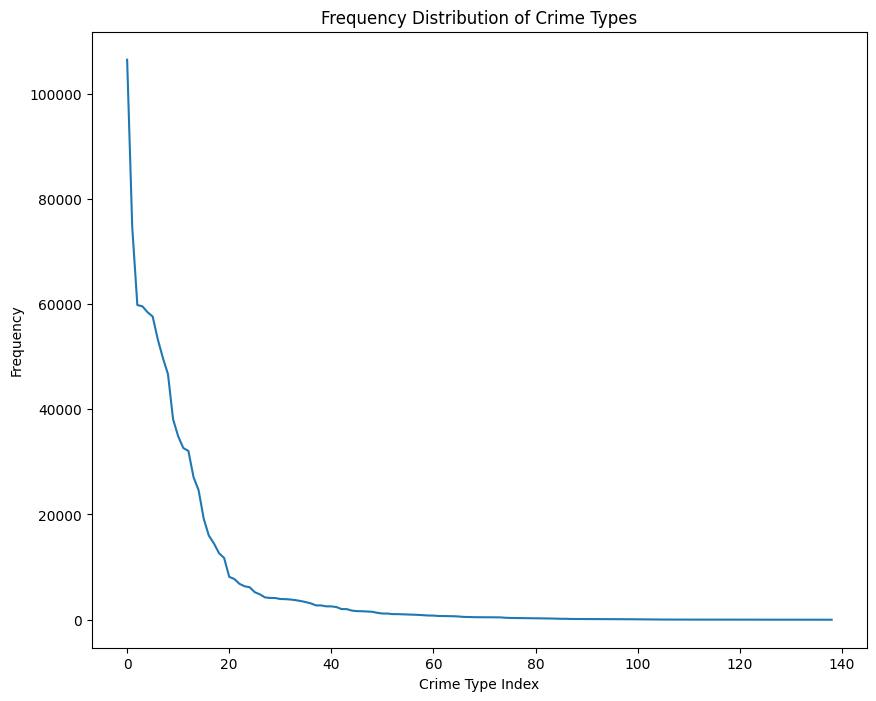

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(crime_type_counts.values)  # This creates a line plot of the frequencies
plt.title('Frequency Distribution of Crime Types')
plt.xlabel('Crime Type Index')
plt.ylabel('Frequency')
plt.show()


### By Area

In [ ]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["area name"])
count_table

area name,77TH,CENTRAL,DEVONSHIRE,FOOTHILL,HARBOR,HOLLENBECK,HOLLYWOOD,MISSION,NEWTON,NORTH HOLLYWOOD,...,OLYMPIC,PACIFIC,RAMPART,SOUTHEAST,SOUTHWEST,TOPANGA,VAN NUYS,WEST LA,WEST VALLEY,WILSHIRE
crm cd desc,,,,,,,,,,,,,,,,,,,,,
ARSON,202,231,52,93,89,99,127,101,180,141,...,142,125,132,157,110,54,93,76,84,129
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,80,157,15,52,24,59,55,38,56,32,...,25,35,39,85,88,29,15,4,29,119
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",5895,4040,1324,1738,2332,2329,2733,1975,3745,1968,...,2669,2014,3090,4848,3610,1525,1613,776,1768,1676
ATTEMPTED ROBBERY,481,456,110,103,169,169,288,164,366,160,...,297,166,353,352,319,126,121,101,155,171
BATTERY - SIMPLE ASSAULT,4704,6787,2680,2417,3143,3088,4482,2602,4150,3422,...,4378,3278,4122,3934,4503,2763,2848,2826,2740,3160
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",3,168,52,10,40,4,86,11,11,58,...,68,681,98,1,686,37,44,203,35,62
VIOLATION OF COURT ORDER,231,141,353,395,402,378,212,367,221,104,...,314,272,262,285,380,240,374,179,518,335
VIOLATION OF RESTRAINING ORDER,670,282,378,512,1196,740,422,1020,894,106,...,498,356,484,781,817,700,419,318,184,379


In [ ]:
chi_squared_area_name = stats.chisquare(count_table, axis=None)
chi_squared_area_name

Power_divergenceResult(statistic=6494526.986947123, pvalue=0.0)

In [ ]:
# Select top 3 crime types based on frequency for clearer visualization
top_crime_types = crime_la['crm cd desc'].value_counts().nlargest(3).index
filtered_data = crime_la[crime_la['crm cd desc'].isin(top_crime_types)]

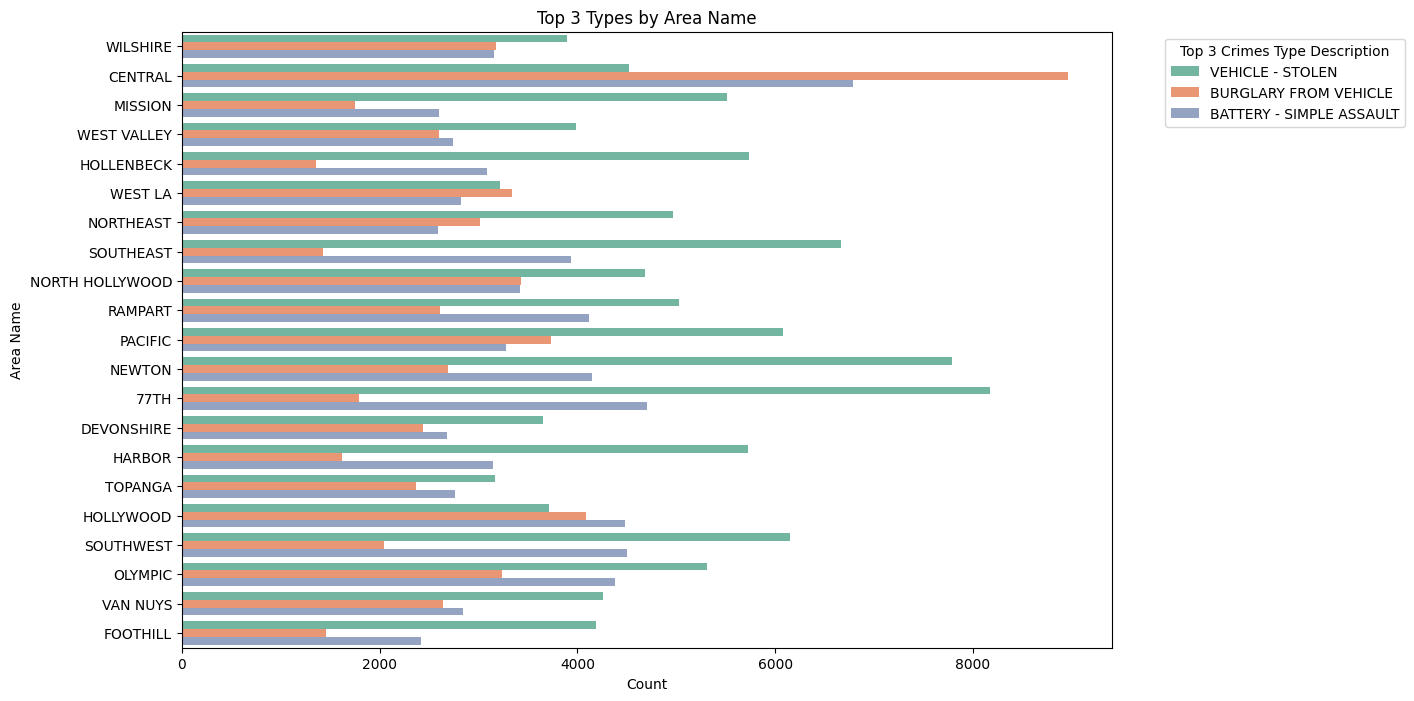

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='area name', hue='crm cd desc', data=filtered_data, palette='Set2')  # Changed to 'Set2'
plt.title('Top 3 Types by Area Name')
plt.xlabel('Count')
plt.ylabel('Area Name')
plt.legend(title='Top 3 Crimes Type Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### vict sex

In [ ]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["vict sex"])
count_table

vict sex,F,M,X
crm cd desc,,,
ARSON,602,1203,741
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,67,634,367
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",14276,38004,1020
ATTEMPTED ROBBERY,1218,3098,504
BATTERY - SIMPLE ASSAULT,35023,39126,465
...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",207,528,1670
VIOLATION OF COURT ORDER,4322,1953,88
VIOLATION OF RESTRAINING ORDER,8888,2773,74


In [ ]:
chi_squared_vict_sex = stats.chisquare(count_table, axis=None)
chi_squared_vict_sex

Power_divergenceResult(statistic=10965593.090410654, pvalue=0.0)

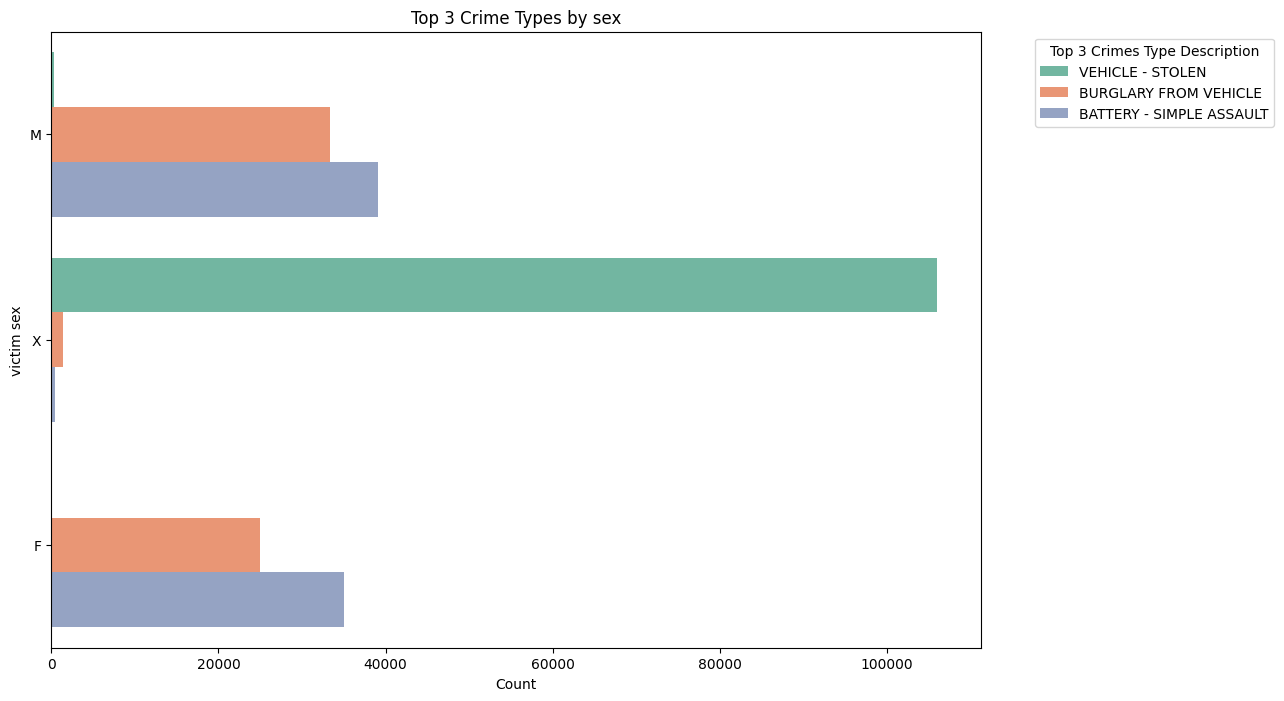

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='vict sex', hue='crm cd desc', data=filtered_data, palette='Set2')  # Changed to 'Set2'
plt.title('Top 3 Crime Types by sex')
plt.xlabel('Count')
plt.ylabel('victim sex')
plt.legend(title='Top 3 Crimes Type Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


In [ ]:
# Filter data for 'VEHICLE - STOLEN' and male victims
filtered_stolen_vehicle = crime_la[(crime_la['crm cd desc'] == 'VEHICLE - STOLEN') & (crime_la['vict sex'] == 'M')]
filtered_stolen_vehicle

,date occ,area name,crm cd desc,vict age,vict sex,vict descent,premis desc,weapon desc,status desc,location,day occ,year,month,day,hour
0,2020-03-01,WILSHIRE,VEHICLE - STOLEN,37.0,M,O,STREET,X,Adult Arrest,1900 S LONGWOOD AV,Sunday,2020,3,1,21
1478,2020-10-05,WEST LA,VEHICLE - STOLEN,37.0,M,H,STREET,X,Invest Cont,MOORPARK,Monday,2020,10,5,10
5576,2020-07-05,77TH,VEHICLE - STOLEN,64.0,M,W,STREET,X,Invest Cont,MANCHESTER AV,Sunday,2020,7,5,19
11698,2020-10-04,NORTHEAST,VEHICLE - STOLEN,17.0,M,H,STREET,X,Invest Cont,MARIPOSA,Sunday,2020,10,4,21
12976,2020-06-02,WILSHIRE,VEHICLE - STOLEN,37.0,M,O,STREET,X,Adult Arrest,4000 W 23RD ST,Tuesday,2020,6,2,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
957686,2024-03-12,77TH,VEHICLE - STOLEN,27.0,M,H,ALLEY,X,Invest Cont,E 84TH ST,Tuesday,2024,3,12,14
958335,2024-02-17,NEWTON,VEHICLE - STOLEN,30.0,M,H,STREET,X,Invest Cont,2800 S CENTRAL AV,Saturday,2024,2,17,16
958743,2024-03-02,SOUTHEAST,VEHICLE - STOLEN,28.0,M,H,STREET,X,Invest Cont,9600 N KALMIA ST,Saturday,2024,3,2,14
961063,2024-01-16,CENTRAL,VEHICLE - STOLEN,37.0,M,B,STREET,X,Invest Cont,700 S GRAND AV,Tuesday,2024,1,16,21


### vict descent

Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

In [ ]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["vict descent"])
count_table

vict descent,A,B,C,D,F,G,H,I,J,K,L,O,P,S,U,V,W,X,Z
crm cd desc,,,,,,,,,,,,,,,,,,,
ARSON,49,288,2,0,0,0,631,0,0,2,0,308,0,0,36,0,394,836,0
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,17,23,0,0,0,0,239,0,0,1,0,109,0,0,0,0,203,476,0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",779,14384,0,1,20,4,26487,12,4,55,0,2749,0,2,3,3,7289,1506,2
ATTEMPTED ROBBERY,114,623,2,0,0,1,2510,3,0,10,0,365,0,1,0,0,638,553,0
BATTERY - SIMPLE ASSAULT,1910,14627,12,0,23,6,37461,15,6,134,0,5908,4,1,4,4,13784,713,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",50,72,4,0,4,0,79,4,7,10,0,95,0,0,1,0,407,1670,2
VIOLATION OF COURT ORDER,128,956,2,0,8,0,3281,1,0,5,0,482,0,0,0,1,1395,104,0
VIOLATION OF RESTRAINING ORDER,195,1826,0,0,6,0,6922,3,0,19,0,657,1,0,0,3,1987,116,0


In [ ]:
chi_squared_vict_descent = stats.chisquare(count_table, axis=None)
chi_squared_vict_descent

Power_divergenceResult(statistic=56107717.383023575, pvalue=0.0)

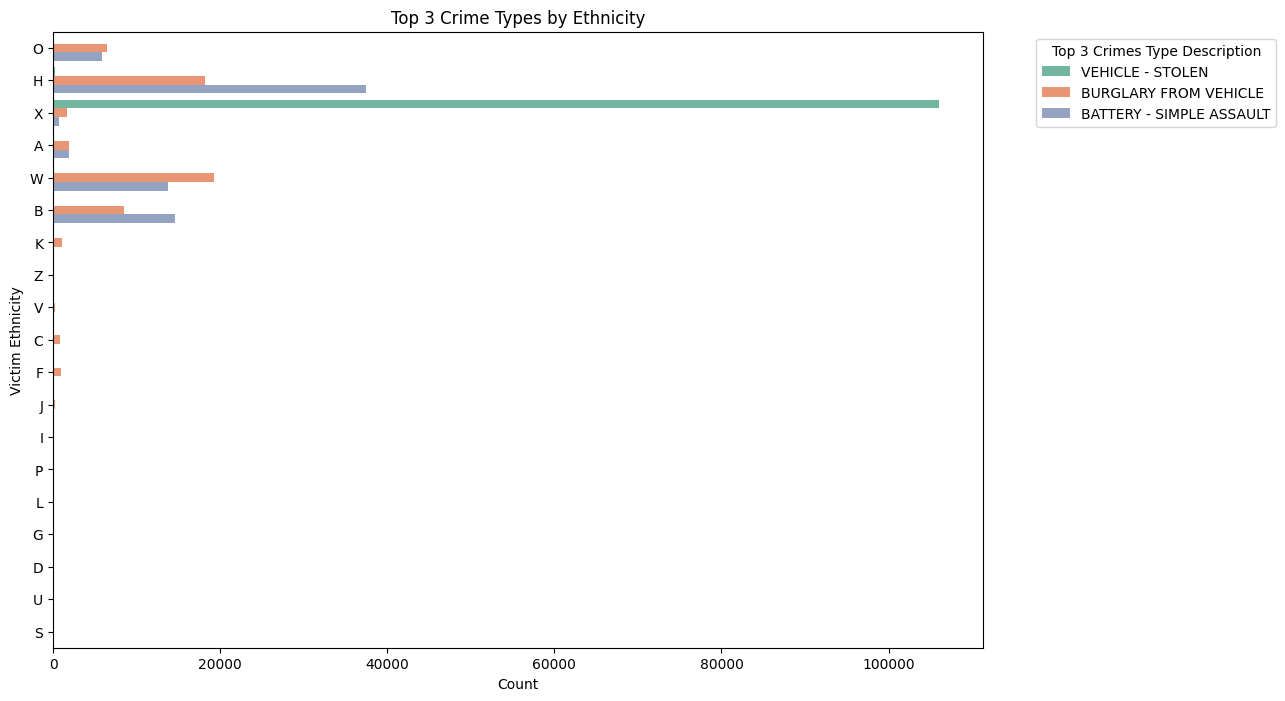

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='vict descent', hue='crm cd desc', data=filtered_data, palette='Set2')  # Changed to 'Set2'
plt.title('Top 3 Crime Types by Ethnicity')
plt.xlabel('Count')
plt.ylabel('Victim Ethnicity')
plt.legend(title='Top 3 Crimes Type Description', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

### premis desc

In [ ]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["premis desc"])
count_table

premis desc,7TH AND METRO CENTER (NOT LINE SPECIFIC),ABANDONED BUILDING ABANDONED HOUSE,ABATEMENT LOCATION,ABORTION CLINIC/ABORTION FACILITY*,AIRCRAFT,ALLEY,AMTRAK TRAIN,AMUSEMENT PARK*,APARTMENT/CONDO COMMON LAUNDRY ROOM,"ARCADE,GAME ROOM/VIDEO GAMES (EXAMPLE CHUCKIE CHEESE)*",...,"VEHICLE STORAGE LOT (CARS, TRUCKS, RV'S, BOATS, TRAILERS, ETC.)","VEHICLE, PASSENGER/TRUCK",VETERINARIAN/ANIMAL HOSPITAL,VIDEO RENTAL STORE,VISION CARE FACILITY*,WAREHOUSE,WATER FACILITY,WEBSITE,X,YARD (RESIDENTIAL/BUSINESS)
crm cd desc,,,,,,,,,,,,,,,,,,,,,
ARSON,4,12,0,0,0,72,0,0,2,0,...,1,140,0,0,0,7,0,0,2,25
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,0,0,0,0,5,29,0,0,1,0,...,0,6,0,0,0,0,0,0,0,5
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",18,14,2,1,2,1100,1,0,9,0,...,4,161,1,0,0,32,0,0,26,454
ATTEMPTED ROBBERY,6,0,0,0,0,74,0,0,0,0,...,0,22,0,0,1,2,0,0,6,8
BATTERY - SIMPLE ASSAULT,72,12,1,3,1,626,4,2,56,1,...,6,268,8,0,0,60,1,1,18,627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",0,1,0,0,0,22,0,0,0,0,...,1,0,0,0,0,2,0,0,0,73
VIOLATION OF COURT ORDER,0,1,0,0,1,21,0,0,4,0,...,0,2,0,0,1,2,0,3,0,38
VIOLATION OF RESTRAINING ORDER,0,0,0,0,0,45,0,0,1,0,...,1,7,0,0,0,6,0,2,0,83


In [ ]:
chi_squared_premis_desc = stats.chisquare(count_table, axis=None)
chi_squared_premis_desc

Power_divergenceResult(statistic=591453041.2910907, pvalue=0.0)

### weapon desc

In [ ]:
# Create crosstab
count_table = pd.crosstab(crime_la["crm cd desc"], crime_la["weapon desc"])
count_table

weapon desc,AIR PISTOL/REVOLVER/RIFLE/BB GUN,ANTIQUE FIREARM,ASSAULT WEAPON/UZI/AK47/ETC,AUTOMATIC WEAPON/SUB-MACHINE GUN,AXE,BELT FLAILING INSTRUMENT/CHAIN,BLACKJACK,BLUNT INSTRUMENT,BOARD,BOMB THREAT,...,TIRE IRON,TOY GUN,UNK TYPE SEMIAUTOMATIC ASSAULT RIFLE,UNKNOWN FIREARM,UNKNOWN TYPE CUTTING INSTRUMENT,UNKNOWN WEAPON/OTHER WEAPON,UZI SEMIAUTOMATIC ASSAULT RIFLE,VEHICLE,VERBAL THREAT,X
crm cd desc,,,,,,,,,,,,,,,,,,,,,
ARSON,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,151,0,1,5,1796
ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER,12,0,0,0,1,3,1,9,2,0,...,1,0,0,19,5,258,0,151,2,0
"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1196,1,24,9,135,52,2,656,194,3,...,49,22,7,2967,485,5882,4,2386,165,3
ATTEMPTED ROBBERY,39,0,4,0,6,2,1,21,7,0,...,1,17,2,60,25,282,0,1,217,0
BATTERY - SIMPLE ASSAULT,12,0,0,0,1,83,0,166,23,2,...,0,10,0,3,2,5704,0,28,180,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,3,1,0,0,0,2393
VIOLATION OF COURT ORDER,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,23,0,0,112,6084
VIOLATION OF RESTRAINING ORDER,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,43,0,0,219,11119


In [ ]:
chi_squared_weapon_desc = stats.chisquare(count_table, axis=None)
chi_squared_weapon_desc

Power_divergenceResult(statistic=444871147.4412039, pvalue=0.0)

In [ ]:
print(f"The chi_squared for area name is: {chi_squared_area_name}")
print(f"The chi_squared for victim sex is: {chi_squared_vict_sex}")
print(f"The chi_squared for victim descent is: {chi_squared_vict_descent}")
print(f"The chi_squared for premise description is: {chi_squared_premis_desc}")
print(f"The chi_squared for weapon description is: {chi_squared_weapon_desc}")


The chi_squared for area name is: Power_divergenceResult(statistic=6494526.986947123, pvalue=0.0)
The chi_squared for victim sex is: Power_divergenceResult(statistic=10965593.090410654, pvalue=0.0)
The chi_squared for victim descent is: Power_divergenceResult(statistic=56107717.383023575, pvalue=0.0)
The chi_squared for premise description is: Power_divergenceResult(statistic=591453041.2910907, pvalue=0.0)
The chi_squared for weapon description is: Power_divergenceResult(statistic=444871147.4412039, pvalue=0.0)


The **“premise description**” has the highest chi-squared statistic, indicating the **strongest association with the target variable “crime type”** (crm cd desc) among the variables tested.

### time occ

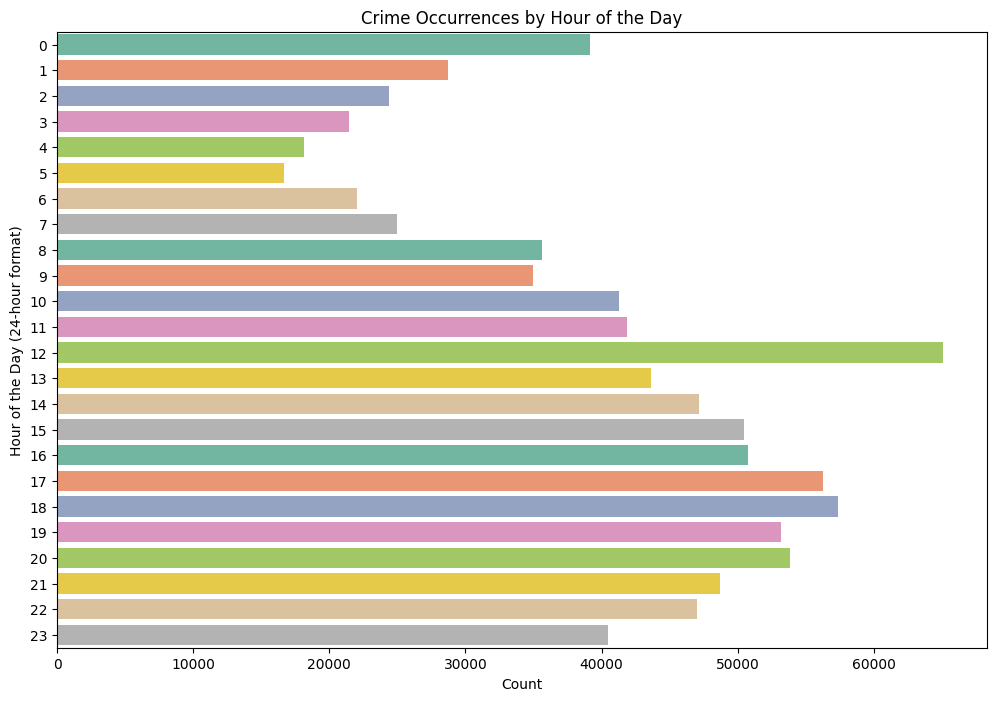

In [ ]:
# Plot the count of each hour
plt.figure(figsize=(12, 8))
sns.countplot(y='hour', data=crime_la, palette='Set2')
plt.title('Crime Occurrences by Hour of the Day')
plt.xlabel('Count')
plt.ylabel('Hour of the Day (24-hour format)')
plt.show()

In [ ]:
# Create a crosstab to see the count of crimes per hour
crosstab_hours = pd.crosstab(crime_la['hour'], columns="count")
print(crosstab_hours)

col_0  count
hour        
0      39130
1      28735
2      24353
3      21415
4      18133
5      16671
6      22025
7      24966
8      35623
9      34945
10     41245
11     41834
12     65058
13     43615
14     47171
15     50491
16     50753
17     56273
18     57351
19     53152
20     53853
21     48696
22     47015
23     40503


# Feature Engineering (EDA)

**Transforming the existing variables**

There are many reasons that existing variables may need to be transformed. Here are some key reasons:


Machine-learning models can only work with numeric variables. So, categorical variables that have text values need to be converted to numeric values.


Some machine-learning models assume that the target variable is normally distributed. To use these models, you may need to transform your target to be normally distributed.


Some machine-learning models are very sensitive to the relative magnitude of values. So, you may need to limit the values of the variables to some fixed range. Usually, you do this by normalizing your variables.


To improve your intuition and your understanding of the data, you may want to transform variables to a different unit of measurement.

In [ ]:
unique_values = crime_la['crm cd desc'].unique()
unique_values

array(['VEHICLE - STOLEN', 'BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)',
       'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)',
       'CHILD ANNOYING (17YRS & UNDER)',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT', 'BURGLARY',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY',
       'BUNCO, GRAND THEFT'

Dropping columns because status is not relevant


In [ ]:
# Drop the specified columns
crime_la = crime_la.drop(columns=['date occ'])

In [ ]:
# Drop the specified columns
crime_la = crime_la.drop(columns=['status desc', 'location', 'premis desc'])

In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   area name     963006 non-null  object 
 1   crm cd desc   963006 non-null  object 
 2   vict age      963006 non-null  float64
 3   vict sex      963006 non-null  object 
 4   vict descent  963006 non-null  object 
 5   weapon desc   963006 non-null  object 
 6   day occ       963006 non-null  object 
 7   year          963006 non-null  int32  
 8   month         963006 non-null  int32  
 9   day           963006 non-null  int32  
 10  hour          963006 non-null  int64  
dtypes: float64(1), int32(3), int64(1), object(6)
memory usage: 69.8+ MB


In [ ]:
# Define violent crimes
violent_crimes = [
    'BATTERY - SIMPLE ASSAULT', 'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
    'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)', 'SEX, UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT', 'BATTERY WITH SEXUAL CONTACT',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'ORAL COPULATION', 'CRIMINAL THREATS - NO WEAPON DISPLAYED',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT', 'ATTEMPTED ROBBERY', 'RAPE, FORCIBLE',
    'RAPE, ATTEMPTED', 'HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE', 'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER', 'KIDNAPPING - GRAND ATTEMPT', 'KIDNAPPING',
    'CRIMINAL HOMICIDE', 'BATTERY ON A FIREFIGHTER'
]

# Create binary target variable
crime_la['violent_crime'] = crime_la['crm cd desc'].apply(lambda x: 1 if x in violent_crimes else 0)

In [ ]:
# Drop the specified columns
crime_la = crime_la.drop(columns=['crm cd desc'])

In [ ]:
crime_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963006 entries, 0 to 963005
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   area name      963006 non-null  object 
 1   vict age       963006 non-null  float64
 2   vict sex       963006 non-null  object 
 3   vict descent   963006 non-null  object 
 4   weapon desc    963006 non-null  object 
 5   day occ        963006 non-null  object 
 6   year           963006 non-null  int32  
 7   month          963006 non-null  int32  
 8   day            963006 non-null  int32  
 9   hour           963006 non-null  int64  
 10  violent_crime  963006 non-null  int64  
dtypes: float64(1), int32(3), int64(2), object(5)
memory usage: 69.8+ MB


Classification problem

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Load data
df = crime_la

# Encode categorical variables
label_encoders = {}
for column in ['area name', 'vict sex', 'vict descent', 'weapon desc']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
df

,area name,vict age,vict sex,vict descent,weapon desc,day occ,year,month,day,hour,violent_crime
0,20,37.0,1,11,79,Sunday,2020,3,1,21,0
1,1,47.0,1,11,79,Saturday,2020,2,8,18,0
2,15,19.0,2,17,79,Wednesday,2020,11,4,17,0
3,17,19.0,1,11,79,Tuesday,2020,3,10,20,0
4,6,28.0,1,6,79,Monday,2020,8,17,12,0
...,...,...,...,...,...,...,...,...,...,...,...
963001,16,44.0,0,11,79,Saturday,2024,2,17,23,0
963002,11,80.0,0,11,65,Tuesday,2024,1,16,15,1
963003,1,37.0,2,17,75,Monday,2024,1,15,1,0
963004,2,37.0,2,17,79,Friday,2024,7,19,7,0


In [ ]:
# Drop the specified columns
df = df.drop(columns=['day occ'])

# Unsupervised Learning using only 2024 data (Compute reasons)
### Dimensionality reduction

In [ ]:
crime_la = df

In [ ]:
crime_la

,area name,vict age,vict sex,vict descent,weapon desc,year,month,day,hour,violent_crime
0,20,37.0,1,11,79,2020,3,1,21,0
1,1,47.0,1,11,79,2020,2,8,18,0
2,15,19.0,2,17,79,2020,11,4,17,0
3,17,19.0,1,11,79,2020,3,10,20,0
4,6,28.0,1,6,79,2020,8,17,12,0
...,...,...,...,...,...,...,...,...,...,...
963001,16,44.0,0,11,79,2024,2,17,23,0
963002,11,80.0,0,11,65,2024,1,16,15,1
963003,1,37.0,2,17,75,2024,1,15,1,0
963004,2,37.0,2,17,79,2024,7,19,7,0


In [ ]:
# Assuming 'crime_la' DataFrame contains the original data with a 'year' column
crime_la_2024 = crime_la[crime_la['year'] == 2024]

# Save the filtered data to a new CSV file
crime_la_2024.to_csv("/content/Crime_Data_2024.csv", index=False)

# Verify the number of rows in the filtered DataFrame
print(f"Total rows from 2024: {len(crime_la_2024)}")

# Load the filtered data from the CSV file
crime_la_2024_loaded = pd.read_csv("/content/Crime_Data_2024.csv")

Total rows from 2024: 86534


In [ ]:
crime_la_2024_loaded

,area name,vict age,vict sex,vict descent,weapon desc,year,month,day,hour,violent_crime
0,16,37.0,1,16,27,2024,4,25,16,0
1,6,22.0,0,1,65,2024,1,21,15,1
2,16,58.0,1,11,65,2024,3,22,18,1
3,12,34.0,0,11,79,2024,4,1,19,0
4,17,26.0,0,6,75,2024,1,26,18,1
...,...,...,...,...,...,...,...,...,...,...
86529,16,44.0,0,11,79,2024,2,17,23,0
86530,11,80.0,0,11,65,2024,1,16,15,1
86531,1,37.0,2,17,75,2024,1,15,1,0
86532,2,37.0,2,17,79,2024,7,19,7,0


In [ ]:
# Define features and target
X = crime_la_2024_loaded.drop(columns=['violent_crime'])
y = crime_la_2024_loaded['violent_crime']

In [ ]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

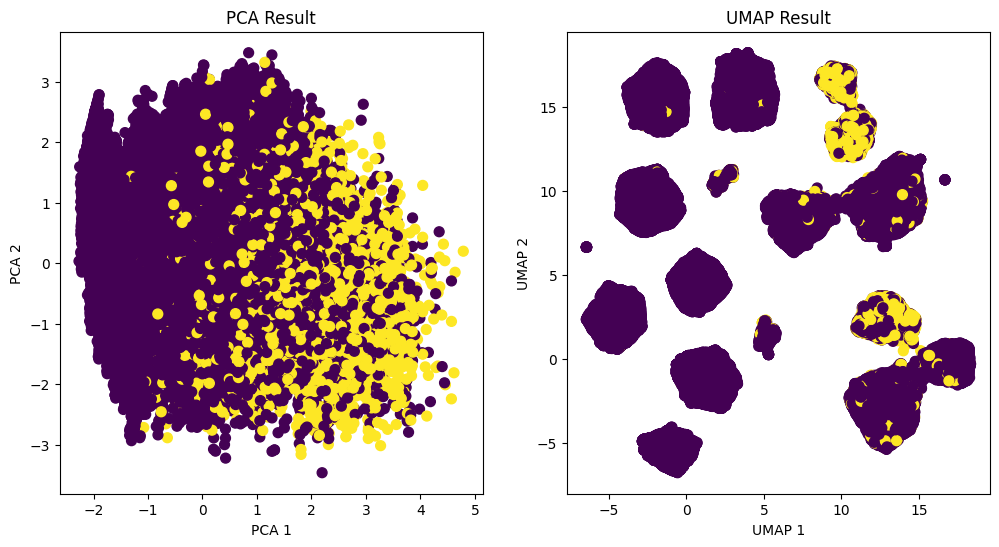

In [ ]:
!pip install umap-learn
from sklearn.decomposition import PCA
import umap

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Apply UMAP
reducer = umap.UMAP(n_components=2)
umap_result = reducer.fit_transform(X_scaled)

# Plot the PCA result
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=y, cmap='viridis', s=50)
plt.title('PCA Result')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

# Plot the UMAP result
plt.subplot(1, 2, 2)
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=y, cmap='viridis', s=50)
plt.title('UMAP Result')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.show()

Clustering

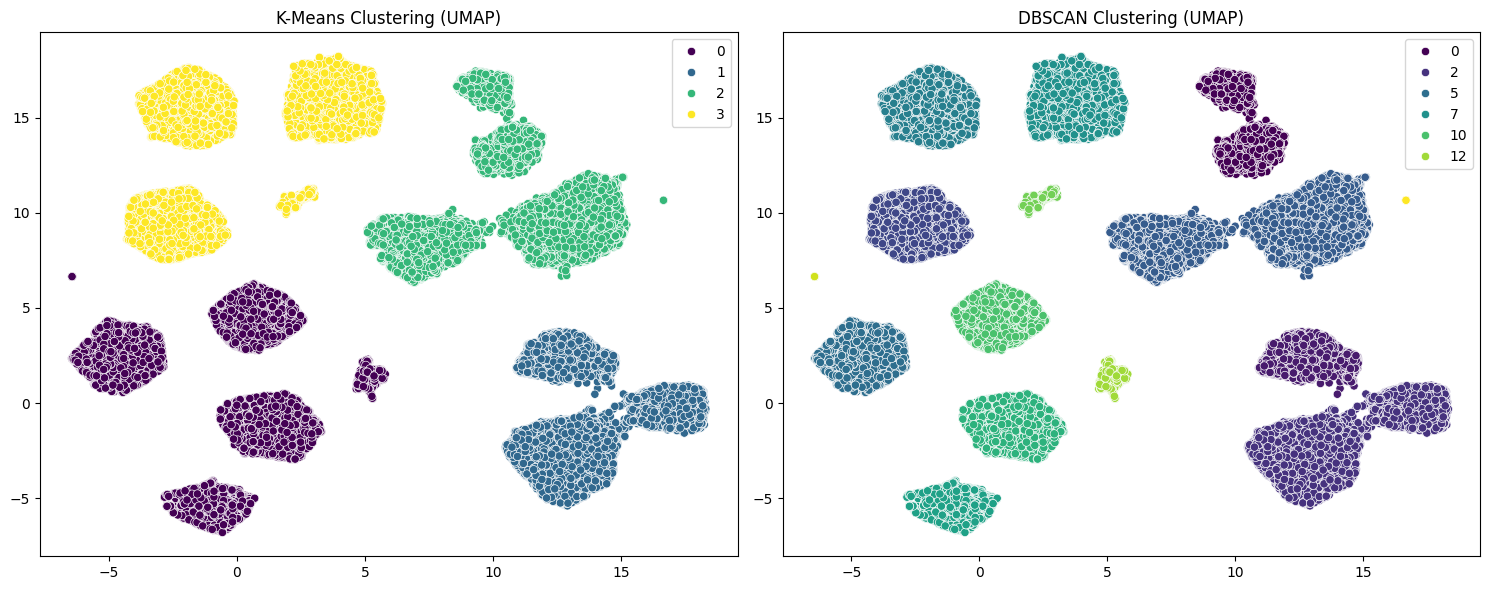

In [ ]:
from sklearn.cluster import DBSCAN, KMeans


# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(umap_result)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(umap_result)

# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# K-Means clustering
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=kmeans_labels, palette='viridis', ax=axes[0])
axes[0].set_title('K-Means Clustering (UMAP)')

# DBSCAN clustering
sns.scatterplot(x=umap_result[:, 0], y=umap_result[:, 1], hue=dbscan_labels, palette='viridis', ax=axes[1])
axes[1].set_title('DBSCAN Clustering (UMAP)')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn import metrics

# Calculate and print the Silhouette Score for K-Means
silhouette_kmeans = metrics.silhouette_score(umap_result, kmeans_labels, metric='euclidean')
print("The silhouette score of the K-Means (UMAP) solution: {}".format(silhouette_kmeans))

# Calculate and print the Silhouette Score for DBSCAN
silhouette_dbscan = metrics.silhouette_score(umap_result, dbscan_labels, metric='euclidean')
print("The silhouette score of the DBSCAN (UMAP) solution: {}".format(silhouette_dbscan))

The silhouette score of the K-Means (UMAP) solution: 0.554388701915741
The silhouette score of the DBSCAN (UMAP) solution: 0.4428390860557556


---

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

Suitable Models for Classification

	1.	Logistic Regression: A simple and interpretable model for binary classification.
	2.	Random Forest: An ensemble method that can handle complex interactions between features and provide feature importance.
	3.	Gradient Boosting (e.g., XGBoost): Another ensemble method that often yields high accuracy.

## Logistic Regression

In [ ]:
# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [ ]:
print(accuracy)
print(report)

0.8193009418386102
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    156126
           1       0.57      0.20      0.29     36476

    accuracy                           0.82    192602
   macro avg       0.70      0.58      0.59    192602
weighted avg       0.79      0.82      0.78    192602



The Logistic Regression model achieved an overall **accuracy of 82%**, demonstrating **good performance in predicting non-violent crimes** with a **precision of 0.84 and a recall of 0.96.** However, it **struggled with predicting violent crimes, showing lower precision (0.57) and recall (0.20)**, resulting in a modest **F1-score of 0.30**. This discrepancy indicates a **class imbalance**, as the dataset contains **significantly more non-violent crimes than violent ones**.

## Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8763304638581115
              precision    recall  f1-score   support

           0       0.94      0.91      0.92    156126
           1       0.65      0.74      0.69     36476

    accuracy                           0.88    192602
   macro avg       0.80      0.82      0.81    192602
weighted avg       0.88      0.88      0.88    192602



The **Random Forest** model achieved an **accuracy of approximately 87.7%**. It shows **high precision (0.94)** and **recall (0.91)** **for predicting non-violent crimes** (class 0), and moderate **precision (0.65) and recall (0.75)** for **predicting violent crimes** (class 1). The **model performs better overall compared to logistic regression, especially in identifying violent crimes, with an f1-score of 0.70 for violent crimes and 0.92 for non-violent crimes**. This indicates the model's stronger ability to correctly identify violent crimes while maintaining high performance for non-violent crimes.

## Hyperprameters tuning

### Logistic Regression model

Reduce the max_iter parameter to make it converge faster. max_iter to 500 instead of 1000

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=500)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8193009418386102
              precision    recall  f1-score   support

           0       0.84      0.97      0.90    156126
           1       0.57      0.20      0.29     36476

    accuracy                           0.82    192602
   macro avg       0.70      0.58      0.59    192602
weighted avg       0.79      0.82      0.78    192602



The results for both Logistic Regression models, with `max_iter` set to 1000 and 500 respectively, **are identical**, yielding an accuracy of 81.99%. The precision, recall, and f1-scores for non-violent crimes (class 0) are consistently high (0.84, 0.96, and 0.90), while those for violent crimes (class 1) are significantly lower (0.57, 0.20, and 0.30). This indicates that **reducing the `max_iter` to 500 did not impact the performance**, suggesting that the model likely converged well before reaching the 500 iterations.

### Randon Forest Model

Reduce the number of trees (n_estimators)

Set n_estimators to 50 instead of 100.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


# Define features and target
X = df.drop(columns=['violent_crime'])
y = df['violent_crime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.8747780396880613
              precision    recall  f1-score   support

           0       0.93      0.91      0.92    156126
           1       0.65      0.72      0.68     36476

    accuracy                           0.87    192602
   macro avg       0.79      0.82      0.80    192602
weighted avg       0.88      0.87      0.88    192602



The Random Forest model with `n_estimators=100` achieved an accuracy of 87.67%, with a precision of 0.94 and recall of 0.91 for non-violent crimes (class 0), and a precision of 0.65 and recall of 0.75 for violent crimes (class 1), resulting in an f1-score of 0.70 for violent crimes. **Reducing the `n_estimators` to 50 slightly decreased the accuracy to 87.59%**, with similar precision (0.94) and recall (0.91) for non-violent crimes, and slightly lower precision (0.65) and recall (0.73) for violent crimes, resulting in an f1-score of 0.69 for violent crimes. **Both configurations of the Random Forest model performed significantly better than the Logistic Regression models**, particularly in **detecting violent crimes**, demonstrating the Random Forest model's robustness and suitability for this classification task.

# Conclusion

The results for **both Logistic Regression models, with `max_iter` set to 1000 and 500 respectively, are identical**, yielding an **accuracy of 81.99%**. The precision, recall, and f1-scores for non-violent crimes (class 0) are consistently high (0.84, 0.96, and 0.90), while those for violent crimes (class 1) are significantly lower (0.57, 0.20, and 0.30).

This indicates that reducing the `max_iter` to 500 did not impact the performance, suggesting that the model likely converged well before reaching the 500 iterations.


The **Random Forest model**, with **`n_estimators` set to 100**, achieved a **higher accuracy of 87.67%**, with improved recall and f1-score for violent crimes (0.65 and 0.70, respectively), indicating a **better overall performance, particularly in identifying violent crimes, compared to the Logistic Regression models**.

# Predictions playground

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import ipywidgets as widgets
from IPython.display import display

# Function to make predictions based on user input and return probability
def predict_crime(area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour):
    input_data = np.array([[area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour]])
    prediction = model.predict(input_data)
    probability = model.predict_proba(input_data)
    if prediction[0] == 1:
        return f"{probability[0][1]*100:.2f}% chance of Violent Crime"
    else:
        return f"{probability[0][0]*100:.2f}% chance of Non-Violent Crime"

# Interactive user input
def on_button_clicked(b):
    area_name = int(area_name_widget.value)
    vict_age = int(vict_age_widget.value)
    vict_sex = int(vict_sex_widget.value)
    vict_descent = int(vict_descent_widget.value)
    weapon_desc = int(weapon_desc_widget.value)
    year = int(year_widget.value)
    month = int(month_widget.value)
    day = int(day_widget.value)
    hour = int(hour_widget.value)
    prediction = predict_crime(area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour)
    output_widget.clear_output()
    with output_widget:
        print(prediction)

area_name_widget = widgets.Text(description='Area Name:')
vict_age_widget = widgets.IntText(description='Victim Age:')
vict_sex_widget = widgets.Text(description='Victim Sex:')
vict_descent_widget = widgets.Text(description='Victim Descent:')
weapon_desc_widget = widgets.Text(description='Weapon Desc:')
year_widget = widgets.IntText(description='Year:')
month_widget = widgets.IntText(description='Month:')
day_widget = widgets.IntText(description='Day:')
hour_widget = widgets.IntText(description='Hour:')

button = widgets.Button(description='Predict Crime')
button.on_click(on_button_clicked)

output_widget = widgets.Output()

display(area_name_widget, vict_age_widget, vict_sex_widget, vict_descent_widget, weapon_desc_widget, year_widget, month_widget, day_widget, hour_widget, button, output_widget)

Text(value='', description='Area Name:')

IntText(value=0, description='Victim Age:')

Text(value='', description='Victim Sex:')

Text(value='', description='Victim Descent:')

Text(value='', description='Weapon Desc:')

IntText(value=0, description='Year:')

IntText(value=0, description='Month:')

IntText(value=0, description='Day:')

IntText(value=0, description='Hour:')

Button(description='Predict Crime', style=ButtonStyle())

Output()

See instructions below

**INTRUCTIONS**


**Example for prediction input**

Area Name: 20

Victim Age: 30

Victim Sex: 1

Victim Descent: 11

Weapon Desc: 63

Year: 2023

Month: 5

Day: 1

Hour: 12

**Meaning:**

Area Name: WILSHIRE

Victim Age: 30 years old

Victim Sex: Male

Victim Descent: Ethnicity 'Other'

Weapon Desc: STICK

Year: 2023

Month: May

Day: 1st day of the month

Hour: Noon

**Other examples:**

**Area Name:** 1 = CENTRAL, 15 = SOUTHWEST, 17 = VAN NUYS


**Victim Sex:** 0 = F, 1 = M, 2 = X (unknown)


**Victim Descent (Ethnicity)**: 6 = Hispanic/Latin/Mexican, 16 = White, 17 = unknown,


**Weapon Desc:** 65 = STRONG-ARM (HANDS, FIST,
FEET OR BODILY FORCE), 79 = Unknown or none


**Year** (YYYY)


**Month** (1-12)


**Day**(1-28)


**Hour** (1-24)

#Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Define the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # For binary classification, use 'softmax' for multi-class
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Accuracy: {accuracy:.4f}')

Epoch 1/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - accuracy: 0.8513 - loss: 0.2643 - val_accuracy: 0.8663 - val_loss: 0.2234
Epoch 2/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - accuracy: 0.8670 - loss: 0.2244 - val_accuracy: 0.8702 - val_loss: 0.2222
Epoch 3/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 77s 2ms/step - accuracy: 0.8690 - loss: 0.2233 - val_accuracy: 0.8714 - val_loss: 0.2212
Epoch 4/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 134s 4ms/step - accuracy: 0.8688 - loss: 0.2228 - val_accuracy: 0.8720 - val_loss: 0.2204
Epoch 5/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 86s 4ms/step - accuracy: 0.8692 - loss: 0.2216 - val_accuracy: 0.8713 - val_loss: 0.2206
Epoch 6/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 62s 3ms/step - accuracy: 0.8697 - loss: 0.2224 - val_accuracy: 0.8723 - val_loss: 0.2200
Epoch 7/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 59s 2ms/step - accuracy: 0.8705 - loss: 0.2214 - val_accuracy: 0.8716 - val_loss: 0.2202
Epoch 8/50
24076/24076 ━━━━━━━━━━━━━━━━━━━━ 90s 3ms/step - accuracy:

# Predictions Deep learning

In [ ]:

from ipywidgets import interact, IntSlider, Dropdown

# Define the prediction function
def predict_crime(area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour):
    # Prepare the input data
    input_data = np.array([[area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour]])
    input_data_scaled = scaler.transform(input_data)  # Scale the input data using the same scaler used in training
    prediction = model.predict(input_data_scaled)

    # Interpret the prediction
    probability = prediction[0][0]
    is_violent_crime = probability > 0.5

    # Print the results
    crime_type = "Violent Crime" if is_violent_crime else "Non-Violent Crime"
    print(f"Prediction: {probability * 100:.2f}% chance of {crime_type}")

# Use interact to create a UI for input
interact(
    predict_crime,
    area_name=IntSlider(min=0, max=25, step=1, value=0, description='Area Name'),
    vict_age=IntSlider(min=0, max=100, step=1, value=30, description='Victim Age'),
    vict_sex=Dropdown(options=[0, 1], value=1, description='Victim Sex'),
    vict_descent=IntSlider(min=0, max=20, step=1, value=11, description='Victim Descent'),
    weapon_desc=IntSlider(min=0, max=100, step=1, value=63, description='Weapon Desc'),
    year=IntSlider(min=2020, max=2024, step=1, value=2023, description='Year'),
    month=IntSlider(min=1, max=12, step=1, value=5, description='Month'),
    day=IntSlider(min=1, max=31, step=1, value=1, description='Day'),
    hour=IntSlider(min=0, max=23, step=1, value=12, description='Hour')
)


interactive(children=(IntSlider(value=0, description='Area Name', max=25), IntSlider(value=30, description='Vi…

<function __main__.predict_crime(area_name, vict_age, vict_sex, vict_descent, weapon_desc, year, month, day, hour)>